# COMPSCIX415.2-014 Final Project : Predicting Music Genres - "Classify"

### Authors

- JACQUAND Matthieu : matthieujacquand@berkeley.edu - https://www.linkedin.com/in/matthieu-jacquand-0b0ba6181/
- POURET Andrew : andrew.pouret@berkeley.edu - https://www.linkedin.com/in/andrew-pouret/

## Project Research Framework

### Foreword

For many of us, music plays a role in our daily lives. We listen to music while working, taking part in hobbies, during our commutes or just for the sake of it. We develop a taste for specific music, become attached to certain artists, albums and genres. 

This is why we decided to conduct our project on music, in order to see how data and data analysis and prediction techniques can be used in this field. It is also fascinating to wonder how music, which in essence is sound, can be numerized, quantified, and thus analyzed. 

In this project, we will be turning towards a concept of music that applies to every piece ever produced : genre. We will be using data and techniques tailored towards the prediction of which genre a piece of sample audio belongs to, studying which machine learning models are most appropriate and pinpointing which boundaries we run into.

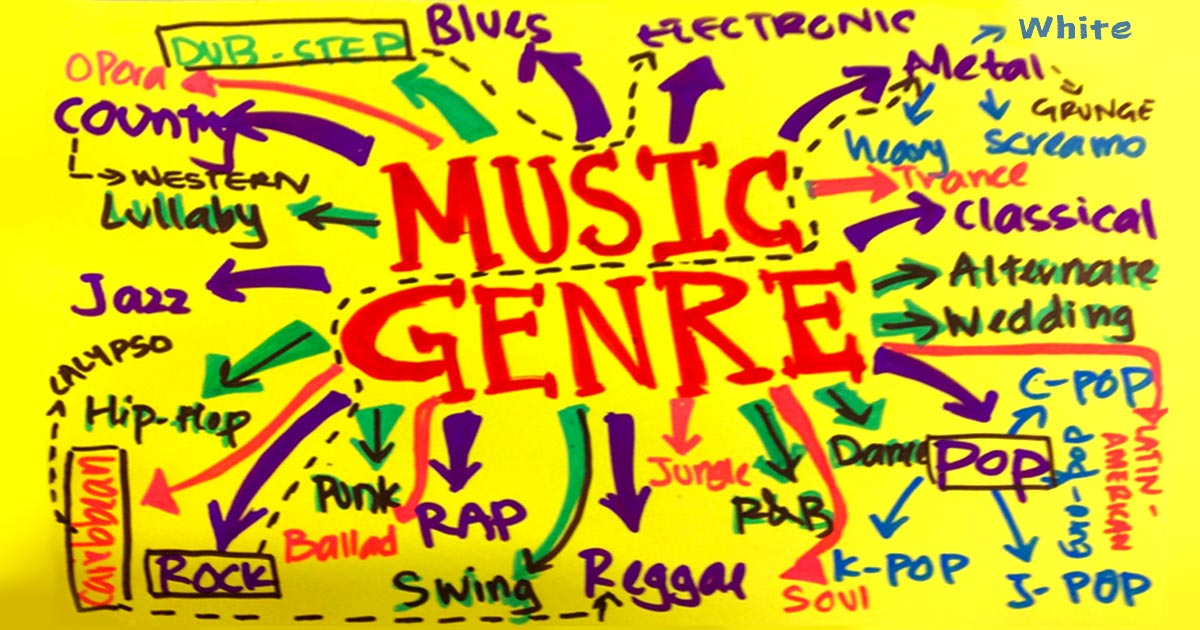

### Data

The dataset we've chosen is from Kaggle, "a subsidiary of Google LLC, is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges." (https://en.wikipedia.org/wiki/Kaggle) 

The dataset can be found here : https://www.kaggle.com/carlthome/gtzan-genre-collection

It consists of 1000 audio samples, each 30 seconds long.
It is divided in 10 sections, each consisting of 100 samples from a specific genre :

- Blues
- Classical
- Country 
- Disco
- Hip-Hop
- Jazz
- Metal
- Pop
- Reggae
- Rock

Orginally, each sample is in a ".au" format, a format used with the software "Audacity" (https://www.audacityteam.org/), a free to use software used to treat sound.

However, for later on production purposes, we've decide to transform these files into ".mp3" files, a more widespread format. This will enable us to perform sample evaluation using any song.





### Research questions

Our main question is : 
**How can we predict music genre from an mp3 file using Python ?**

To supplement this question and further interrogate ourselves in our approach, we can ask ourselves :


- Which are the most important features to predict a genre?
- What are the features types (numeric/textual/visual)?
- Looking at the features, what differentiates each music genre (e.g : classical music from disco and disco from pop) ?
- Are there groups of genres that look alike features wise? Can that turn out to be an issue in prediction? 
- Is the music’s spectrogram useful to use to make predictions?
- How will dataset volumetry affect model runtime and feature CSV creation?
- How do the scales of the features compare with each other? 
- Are there any correlations between features ?
- For the human ear, rock and metal are similar genres compared to reggae, is this also true when looking at the features? 
- Which ML algorithms will prove to be most efficient in predicting music genres ?
- Can we make accurate predictions using any mp3 outside of the dataset (sample evaluation) ? 
- Is data normalisation required ?
- Once the model is operational, is it important to extract x seconds or just run the whole music?
- Once the model is operational, will audio quality be an issue to extract features of tracks we wish to identify? 
- Which techniques can be employed to boost precision?


### Hypotheses

Our approach will be guided by these first hypotheses, which we will confront throughout this work with our results :

- Numeric features extracted from audio samples can be used for prediction.
- The prediction we are looking for is one relative to classification, as our data consists of 10 distinct genres.
- Since we require classification : Support Vector Machines, K-Nearest Neighbors and Neural Networks will be tested.
- Audio Spectograms have proven to be relevant in audio treatment, we will explore this as well.


### Workflow

The data consists solely of the audio samples. The process we now have to follow is as presented in the graphic below :

- Extracting features from the mp3 file
- Scaling these features, and encoding them when necessary in order to have only numeric features
- Plugging these features in our classifying model
- Obtaining the predicted genre

![workflow-figure](./docs/OverallWorkflow.jpg)

### Feature Extraction

In order to extract numeric features from our data, we will use a Python library called Librosa.  Librosa "is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems." (https://librosa.org/doc/latest/index.html)


Using this library, we will extract a total of 64 features for each audio sample. These features will be inserted inside a CSV file alongside filename and genre label, thus leading to a CSV file of 1000 lines for 66 columns. Among the features we will extract are :

- Mel-frequency cepstral coefficients (MFCCs)
- Spectral contrast
- Spectal flatness
- Spectral centroid
- Rolloff frequency
- Chroma variant “Chroma Energy Normalized” or CENS
- Tonal centroid features or tonnetz
- Zero crossing rate


![dataset-extraction-figure](./docs/FeatureExtractionCSV_V2.jpg)

Once are features are extracted and our CSV file is ready, we can move on to the Data Science Analysis. The code for feature extraction is presented below.

In [4]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
#CSV header creation

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
for i in range(1, 13):
    header += f' cqt{i}'
for i in range(1, 13):
    header += f' cens{i}'
for i in range(1, 8):
    header += f' cont{i}'
header += ' spectram_flatness'
for i in range(1, 7):
    header += f' tonnetz{i}'
header += ' label'
header = header.split()

In [ ]:
#CSV creation

import csv

mp3_dir_path = "./datasets/songs/genres_mp3"
output_file = "./datasets/data-V2.csv"
file = open(output_file, 'w+', newline='')


with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'{mp3_dir_path}/{g}'):  #RENAME PATH HERE
        songname = f'{mp3_dir_path}/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        chroma_cqt = librosa.feature.chroma_cqt(y=y, sr = sr)
        chroma_cens = librosa.feature.chroma_cens(y=y, sr = sr)
        spec_con = librosa.feature.spectral_contrast(y=y, sr=sr)
        spec_flat = librosa.feature.spectral_flatness(y=y)
        tonnetz = librosa.feature.tonnetz(y = y, sr = sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        for f in chroma_cqt :
            to_append += f' {np.mean(f)}'
        for h in chroma_cens :
            to_append += f' {np.mean(h)}'
        for i in spec_con :
            to_append += f' {np.mean(i)}'
        for j in spec_flat :
            to_append += f' {np.mean(j)}'
        for k in tonnetz :
            to_append += f' {np.mean(k)}'
        to_append += f' {g}'
        file = open(output_file, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

## Data Science Analysis

### Numerical and Graphical Descriptive analysis



The following segment of code allow us to defin our default parameters for font and text sizes, as well as importing some of the major libraries we will be using.

In [11]:
%config IPCompleter.greedy=True
%pylab inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb




Populating the interactive namespace from numpy and matplotlib


Let us now load the data from our CSV into a pandas dataframe.

In [13]:
#Loading data from CSV file

dataset_file = "datasets/datav2.csv"

df = pd.read_csv(dataset_file, sep=",")

**What are the features types (numeric/textual/visual)?**

The dataset doesn't contain any null/nan values and every feature is quantitive continuous (except filename and label which are strings).

#### Feature Correlation

The features of this dataset being continuous but with different scales we will use Pearson's correlation.

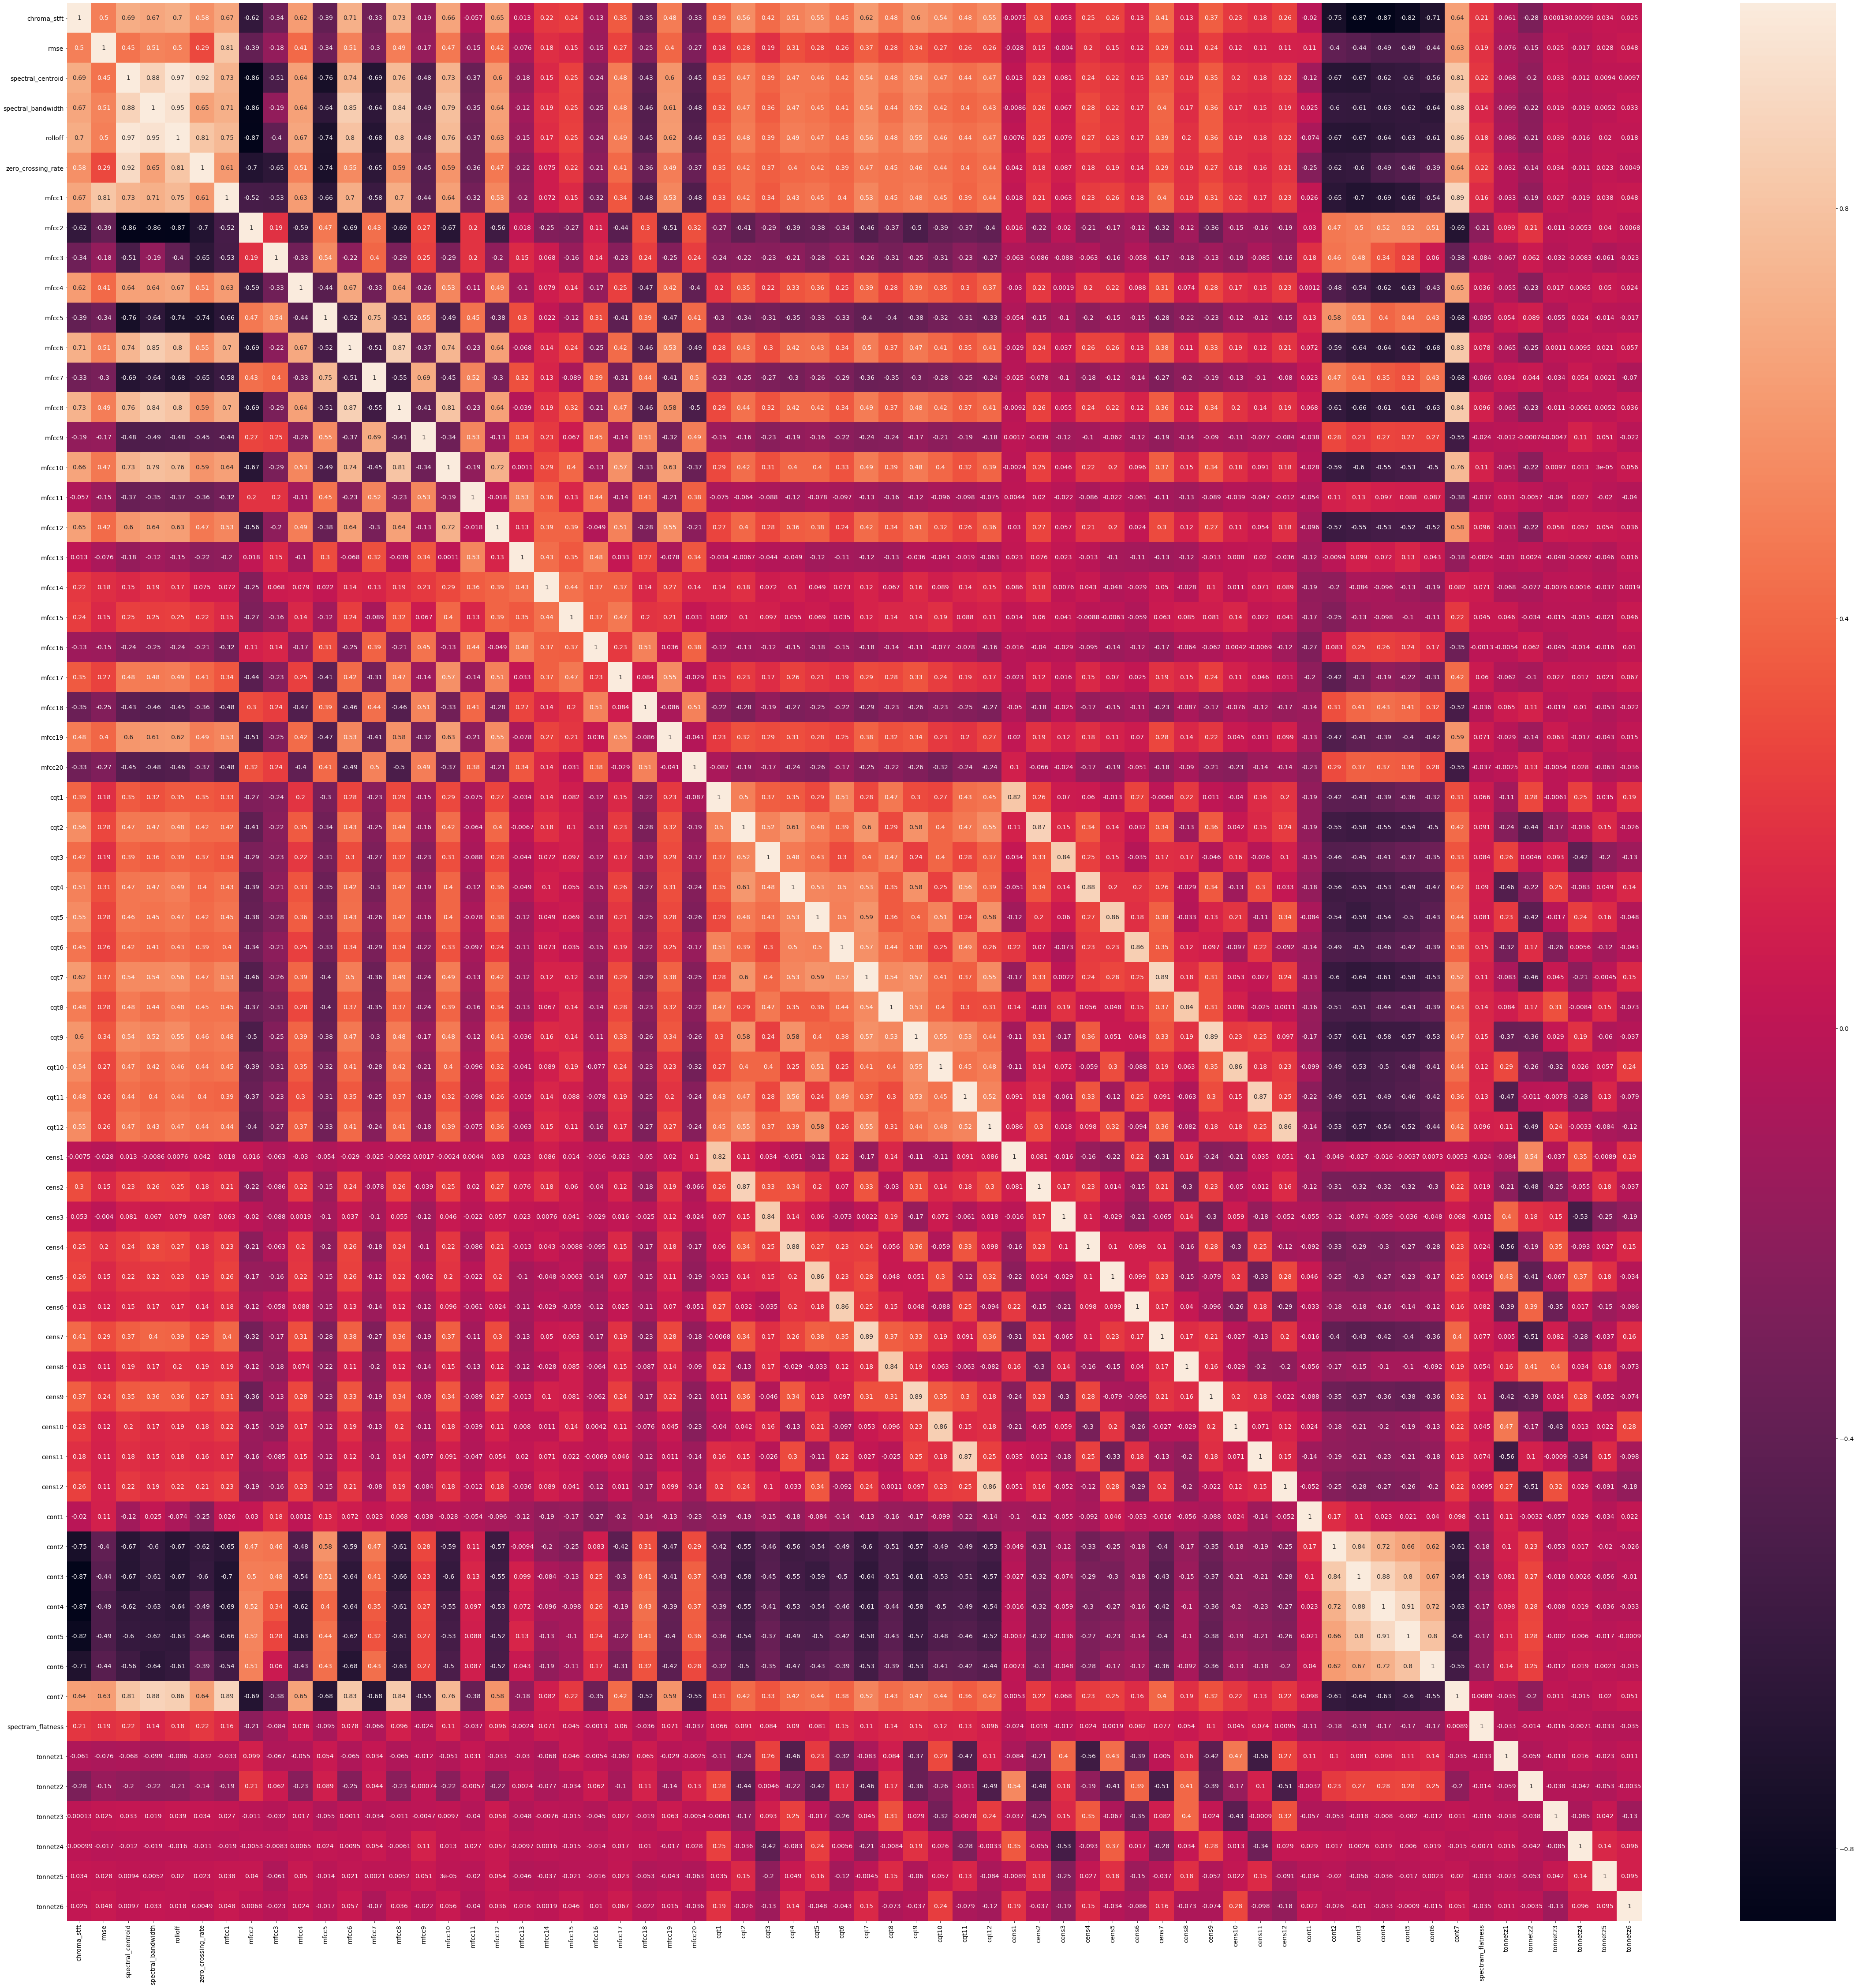

In [15]:
corrMatrix = df.corr(method="pearson")

fig, ax = plt.subplots(figsize=(80,80))   
ax = sb.heatmap(corrMatrix, annot=True)
plt.show()

This correlation matrix is quite big but we can zoom in by double clicking.

We find a strong correlation between features, which is quite logicial since each feature are spectral properties obtained by some signal processing methods that perhaps.

It would be unwise to use a model such as Naive Bayes that requires features to be independant.

# TODO

2.2 Correlation and Regression:Amongst the quantitative variables generate Relationships and Associations. Identify two quantitative variables of interest that might be correlatedand then perform the following analysis:

a)Find the correlation coefficient between the explanatory and response variable.

b)Create a scatter diagram and find  R squared.

c)Validate if the correlation is significant by conducting a Hypothesis test.Provide your rationale and justify your findings regarding the correlation between two quantitative variables of interest.

2.3 Inferential StatisticsTo validate the patterns demonstrated by the data within the descriptive analysis the following tests should be implemented contextually:

a)Implement the t test Independent and pairedt test.

#### Descriptive summaries

Let us see how some features vary within genre. Let us look at :

- Spectral centroid
- Chromagram (chroma_stft)
- Root Mean Square (RMSE)
- Spectral Bandwith
- Rolloff frequency
- Zero crossing rate
- Mel frequency coefficient 1

#### Spectral centroid

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:366: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


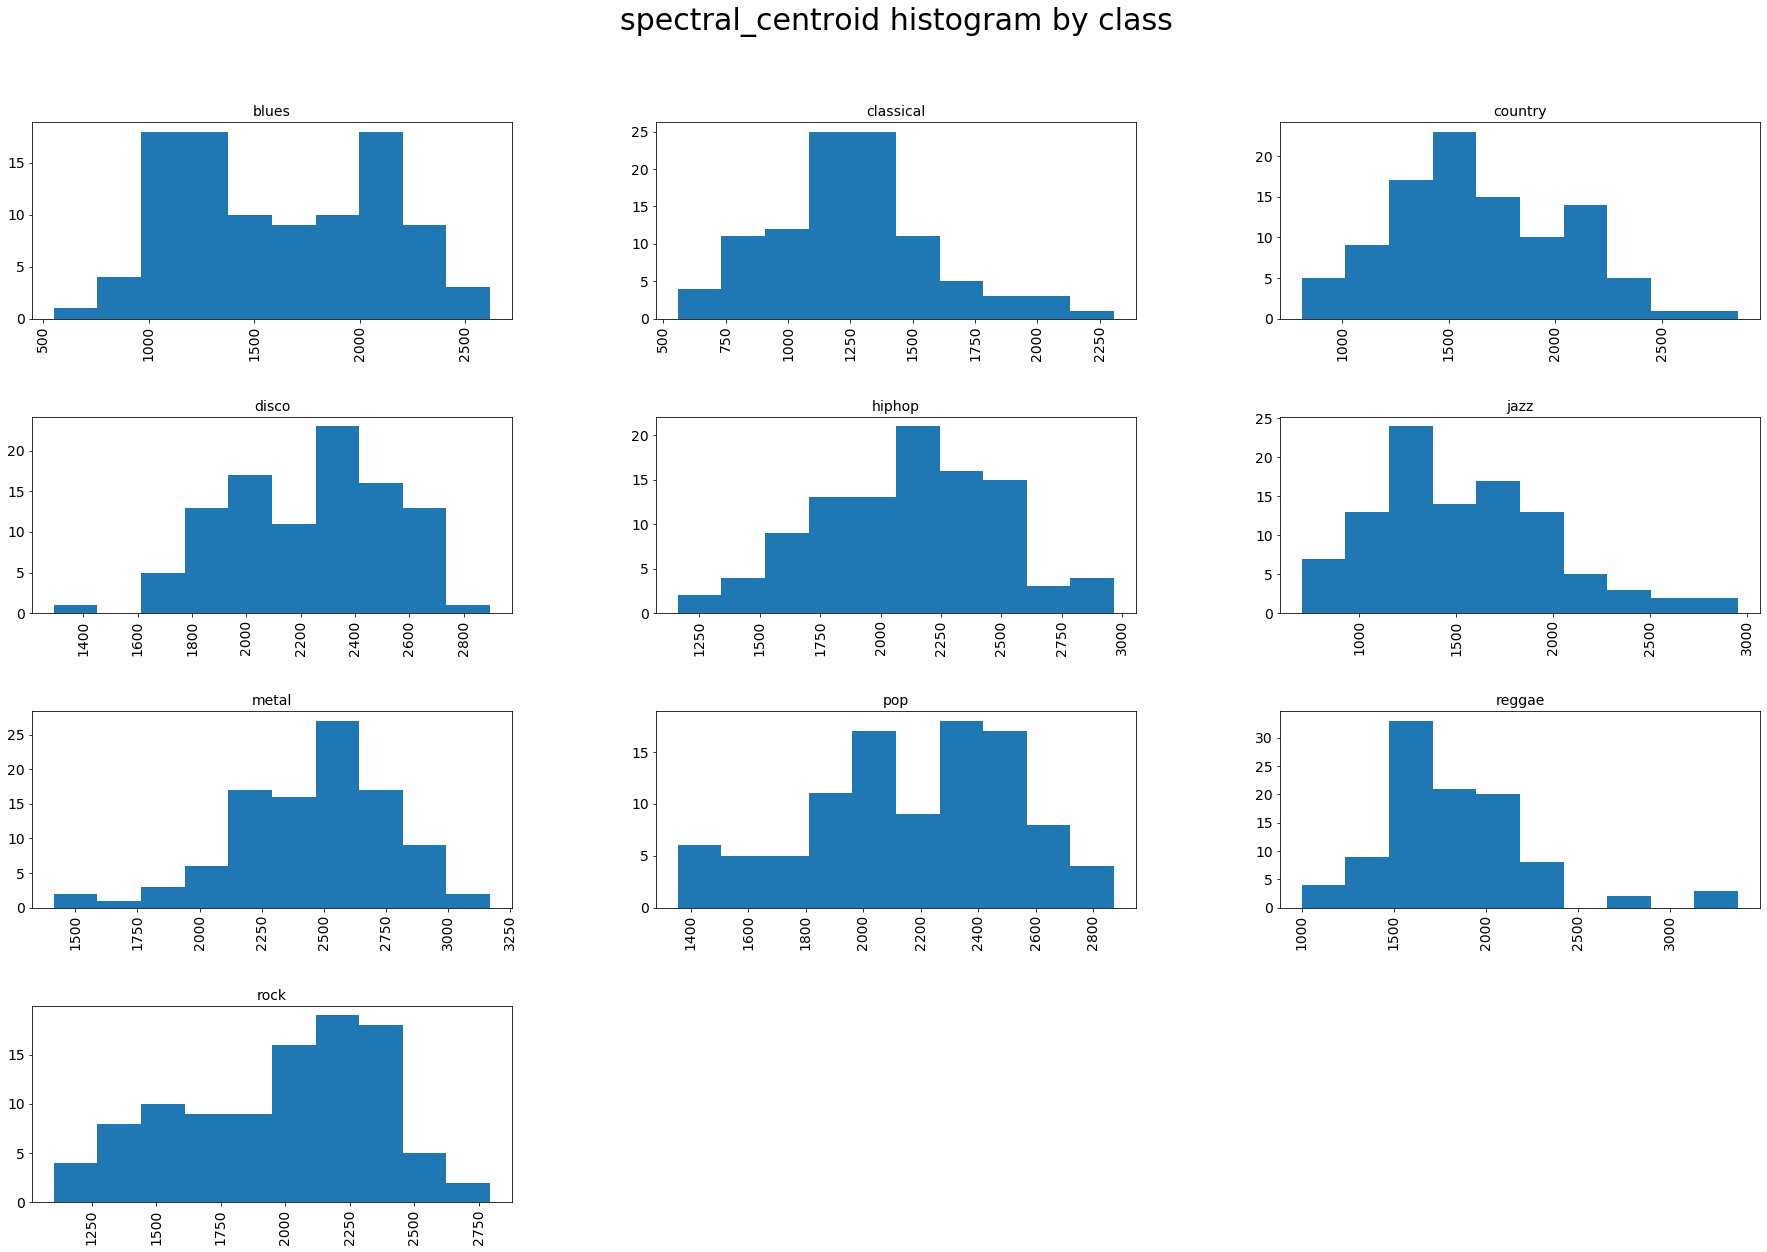

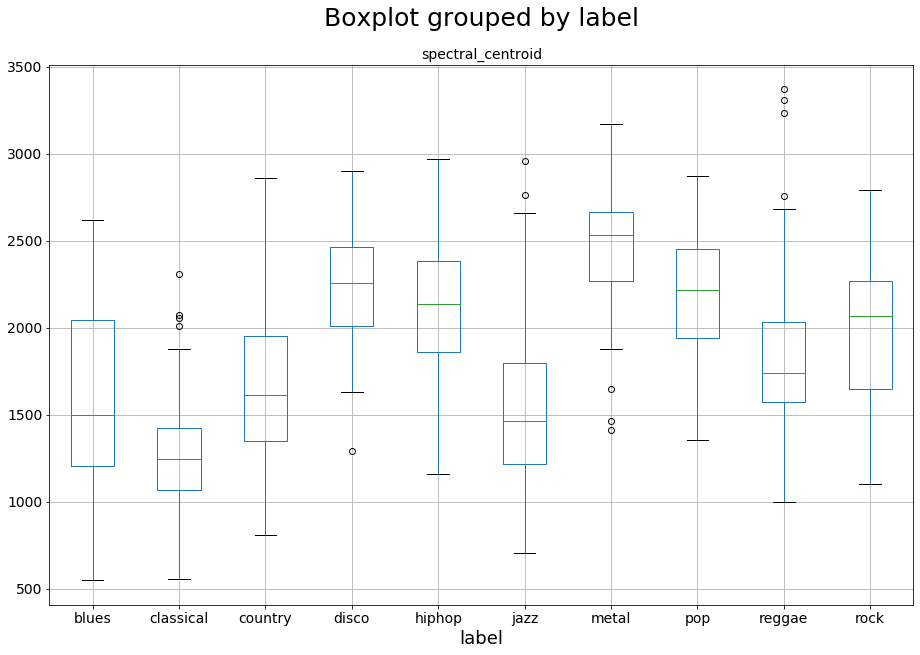

In [16]:
from ml_toolbox import plot_histograms, plot_boxes

plot_histograms(df, "spectral_centroid")
plot_boxes(df, "spectral_centroid")

The range of the Spectral Centraoid within a genre is large (a difference of 1000-2000 at least between min and max values of a genre), but 50% of songs within a "genre" are grouped together on a much smaller ranges.

The median for every genre is centered over except for reggae and metal. 

In terms of histogram, some genres like hiphop are, jazz or metal follow a positively or negatively skewed distribution wheras the others don't follow a normal distribution. 

However classical, reggae and metal have a lot of outliers. 

Classical in terms of the spectral centroid has 50% of its invididuals with a lower value than every other genre except (Jazz).

#### RMSE 

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:366: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


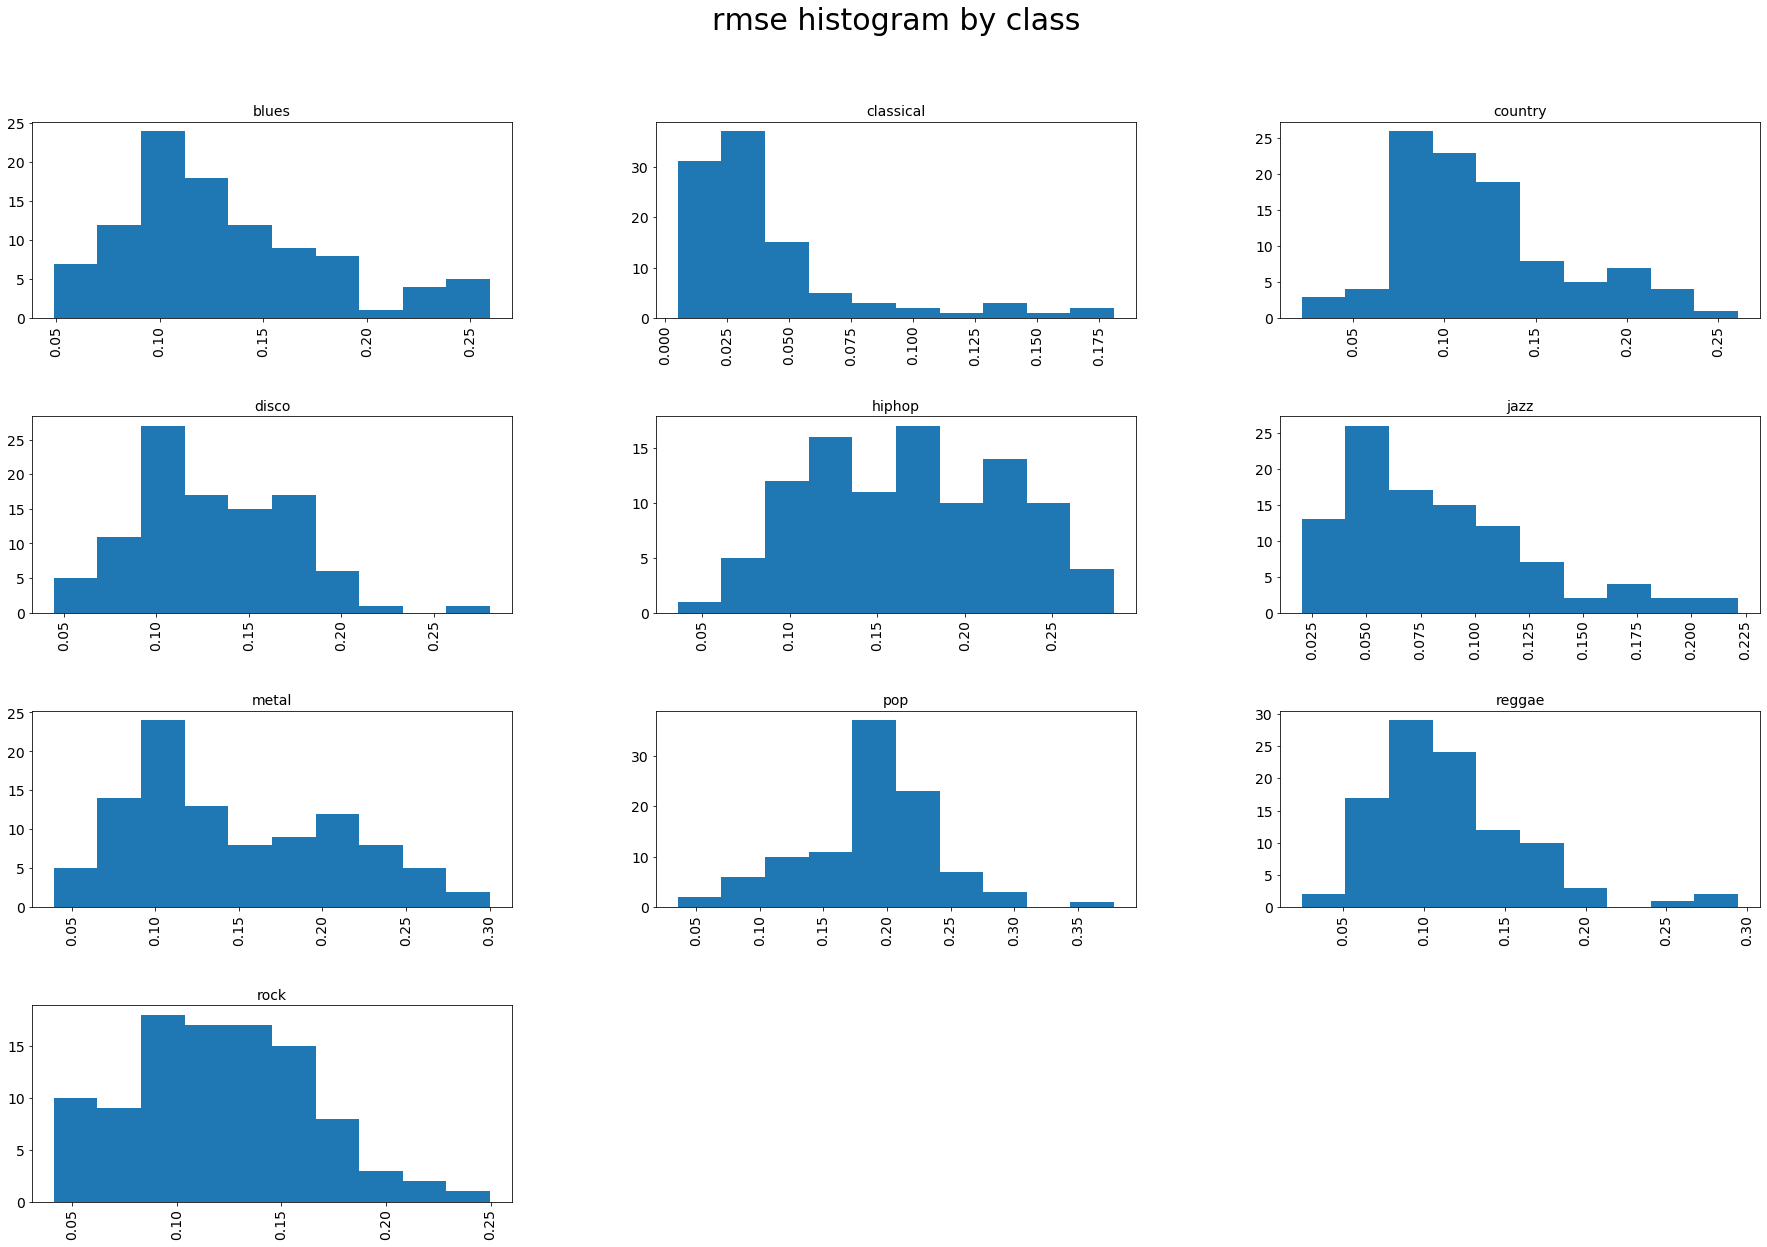

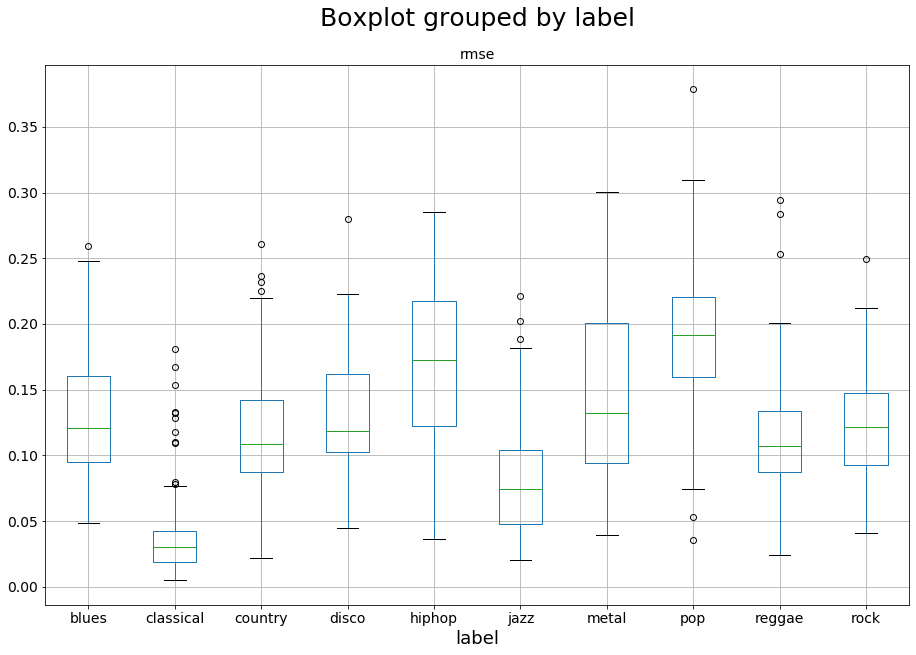

In [17]:
plot_histograms(df, "rmse")
plot_boxes(df, "rmse")

#### Spectral Bandwith

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:366: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


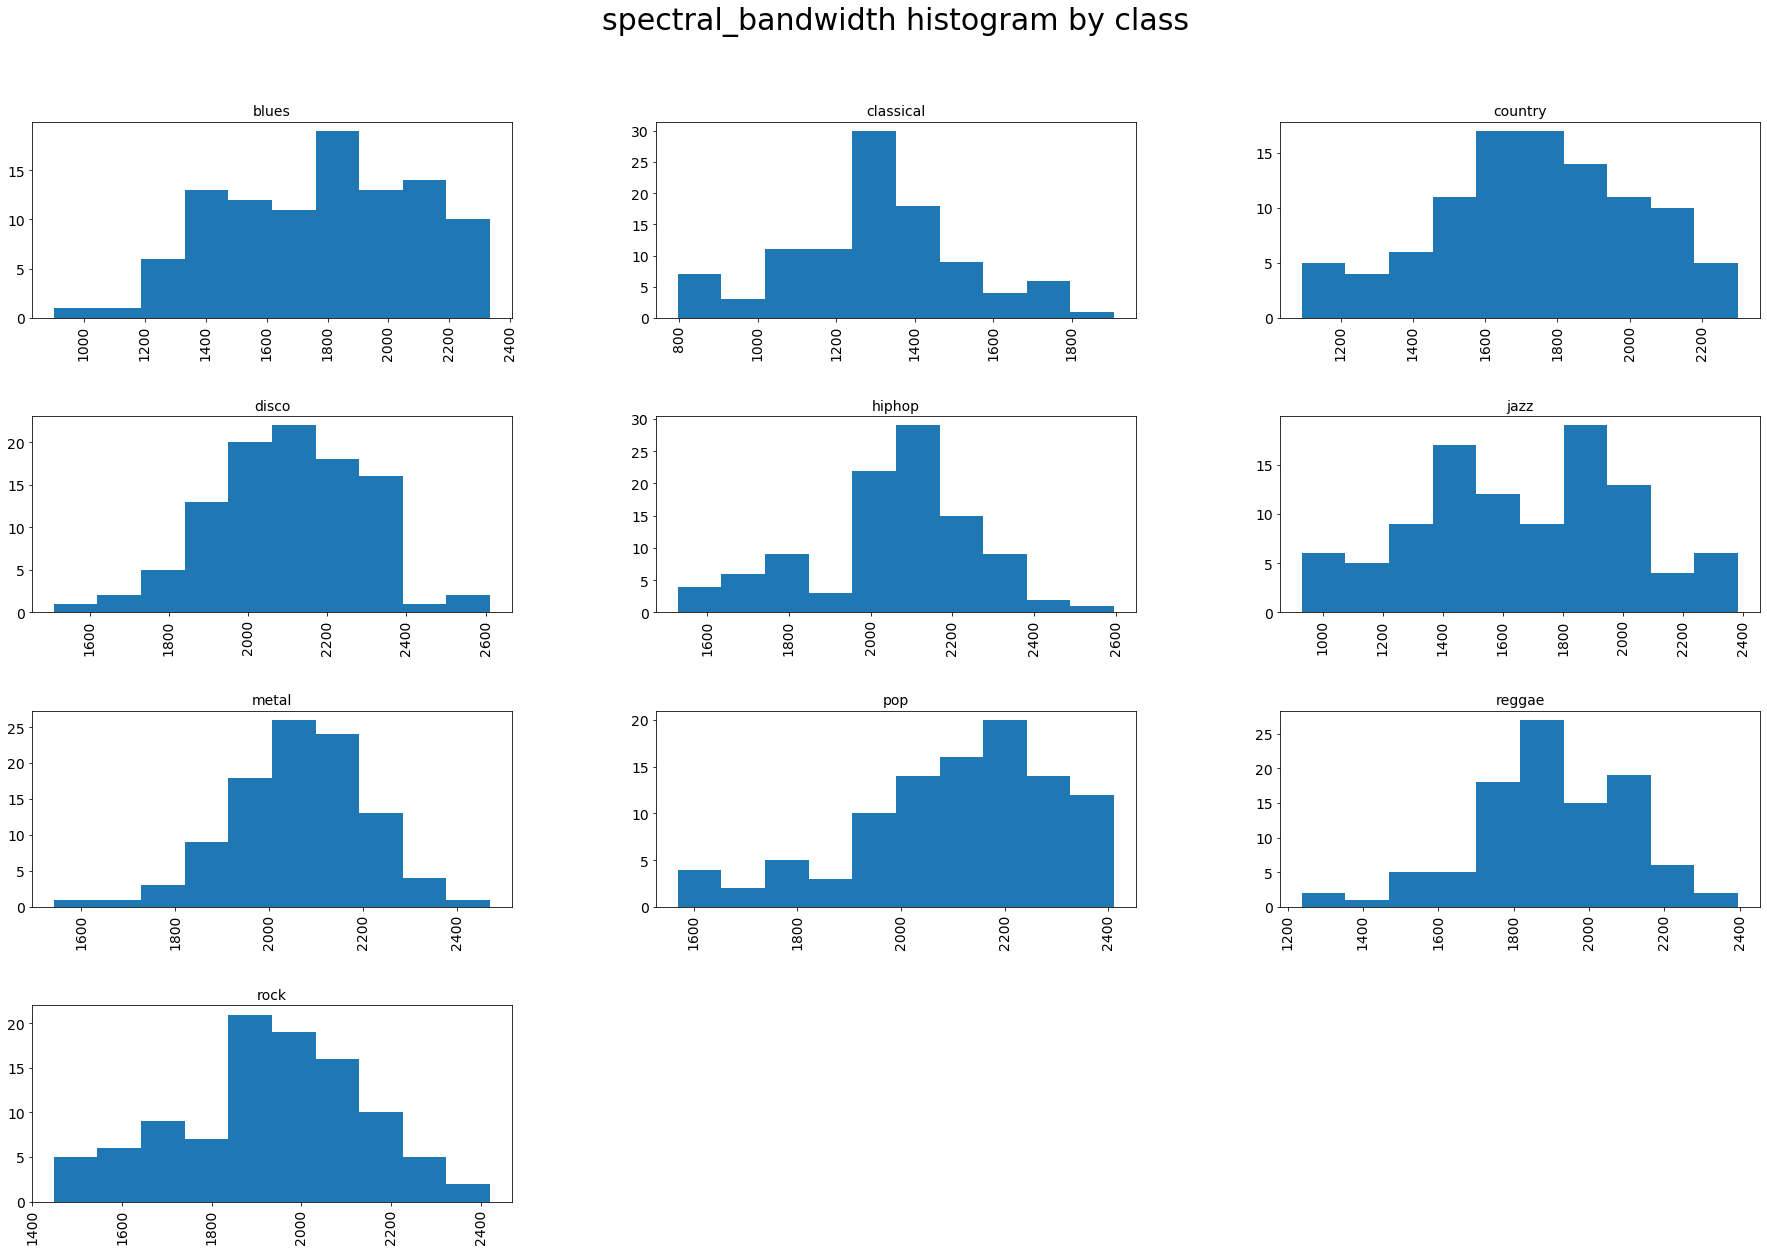

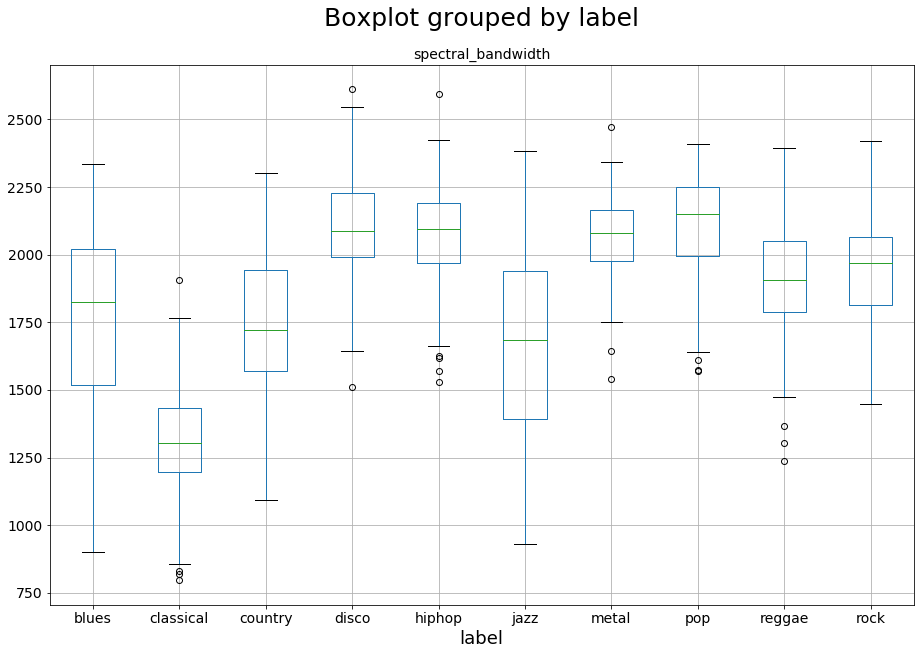

In [18]:
plot_histograms(df, "spectral_bandwidth")
plot_boxes(df, "spectral_bandwidth")

#### Rolloff frequency

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:366: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


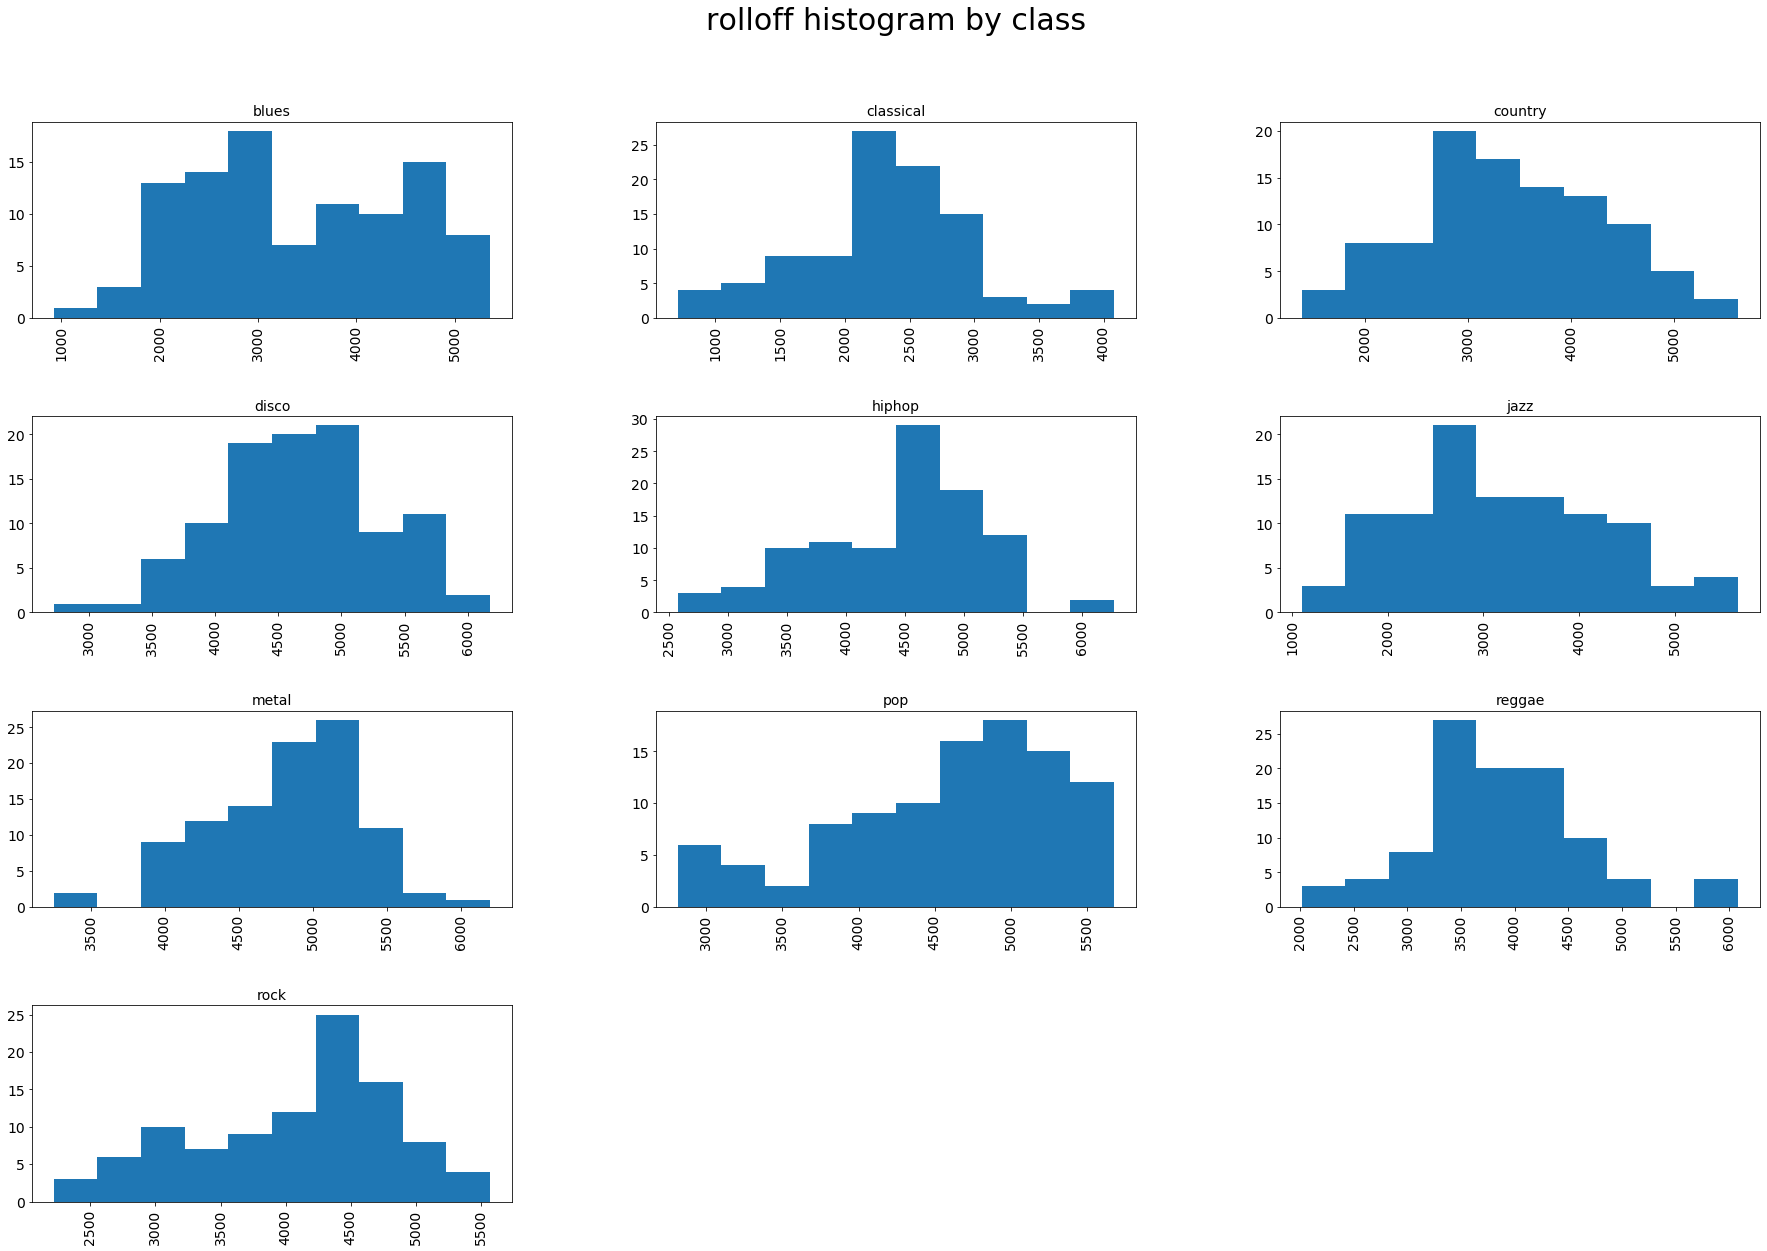

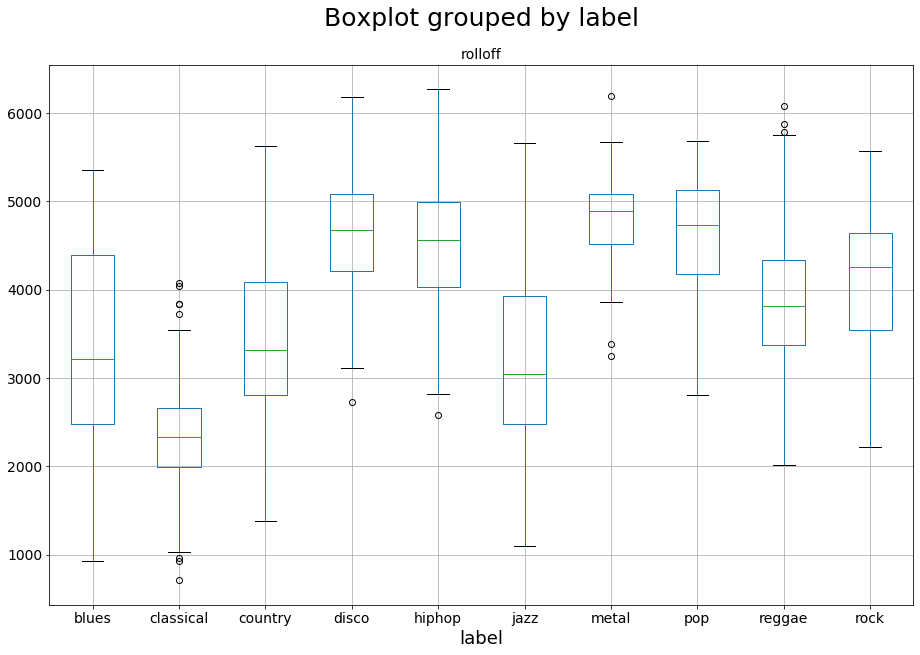

In [19]:
plot_histograms(df, "rolloff")
plot_boxes(df, "rolloff")

#### Zero crossing rate

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:366: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


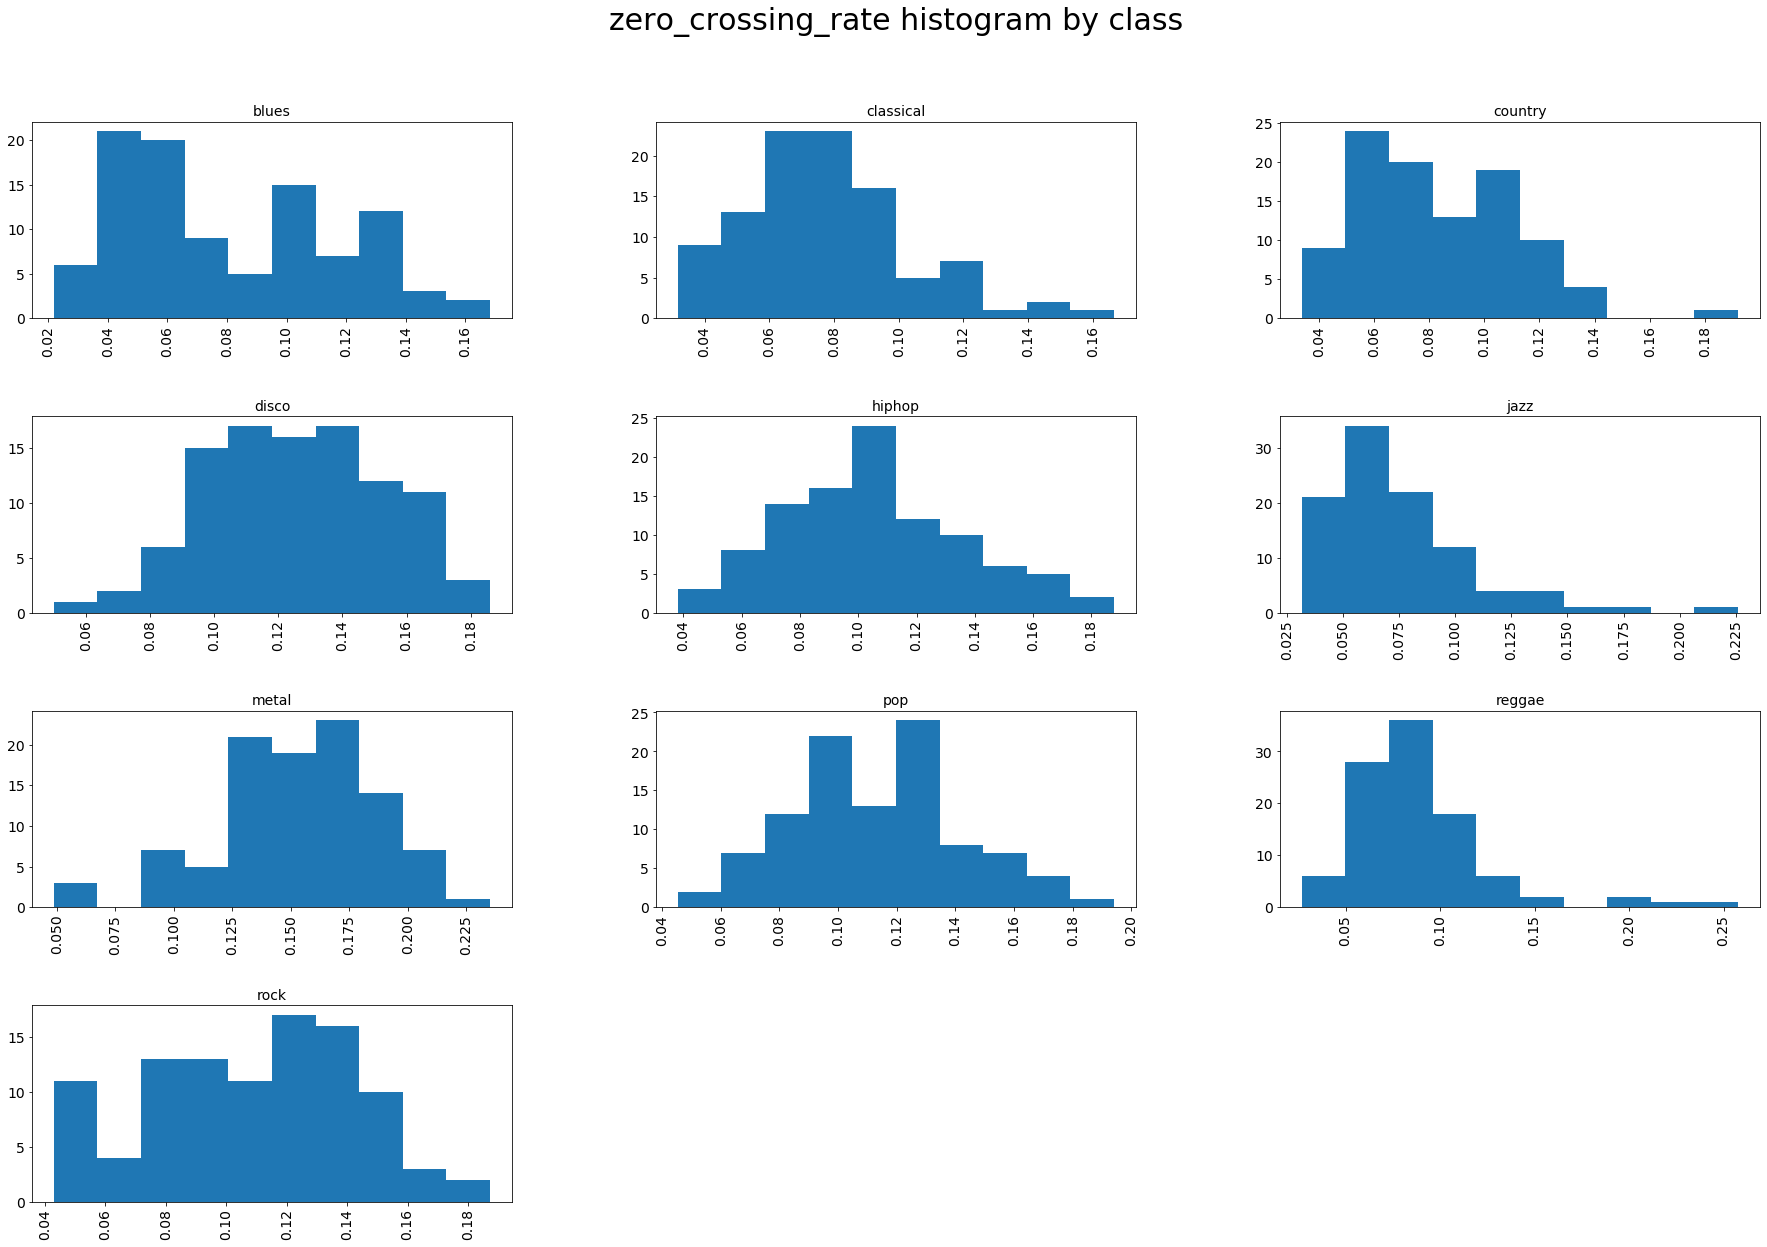

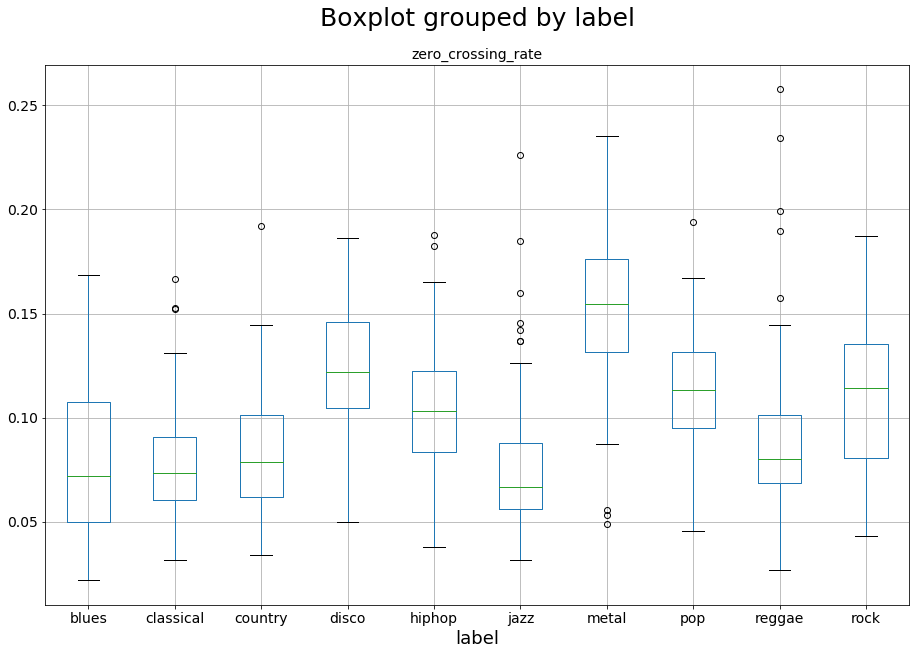

In [20]:
plot_histograms(df, "zero_crossing_rate")
plot_boxes(df, "zero_crossing_rate")

#### MFCC1

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:366: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


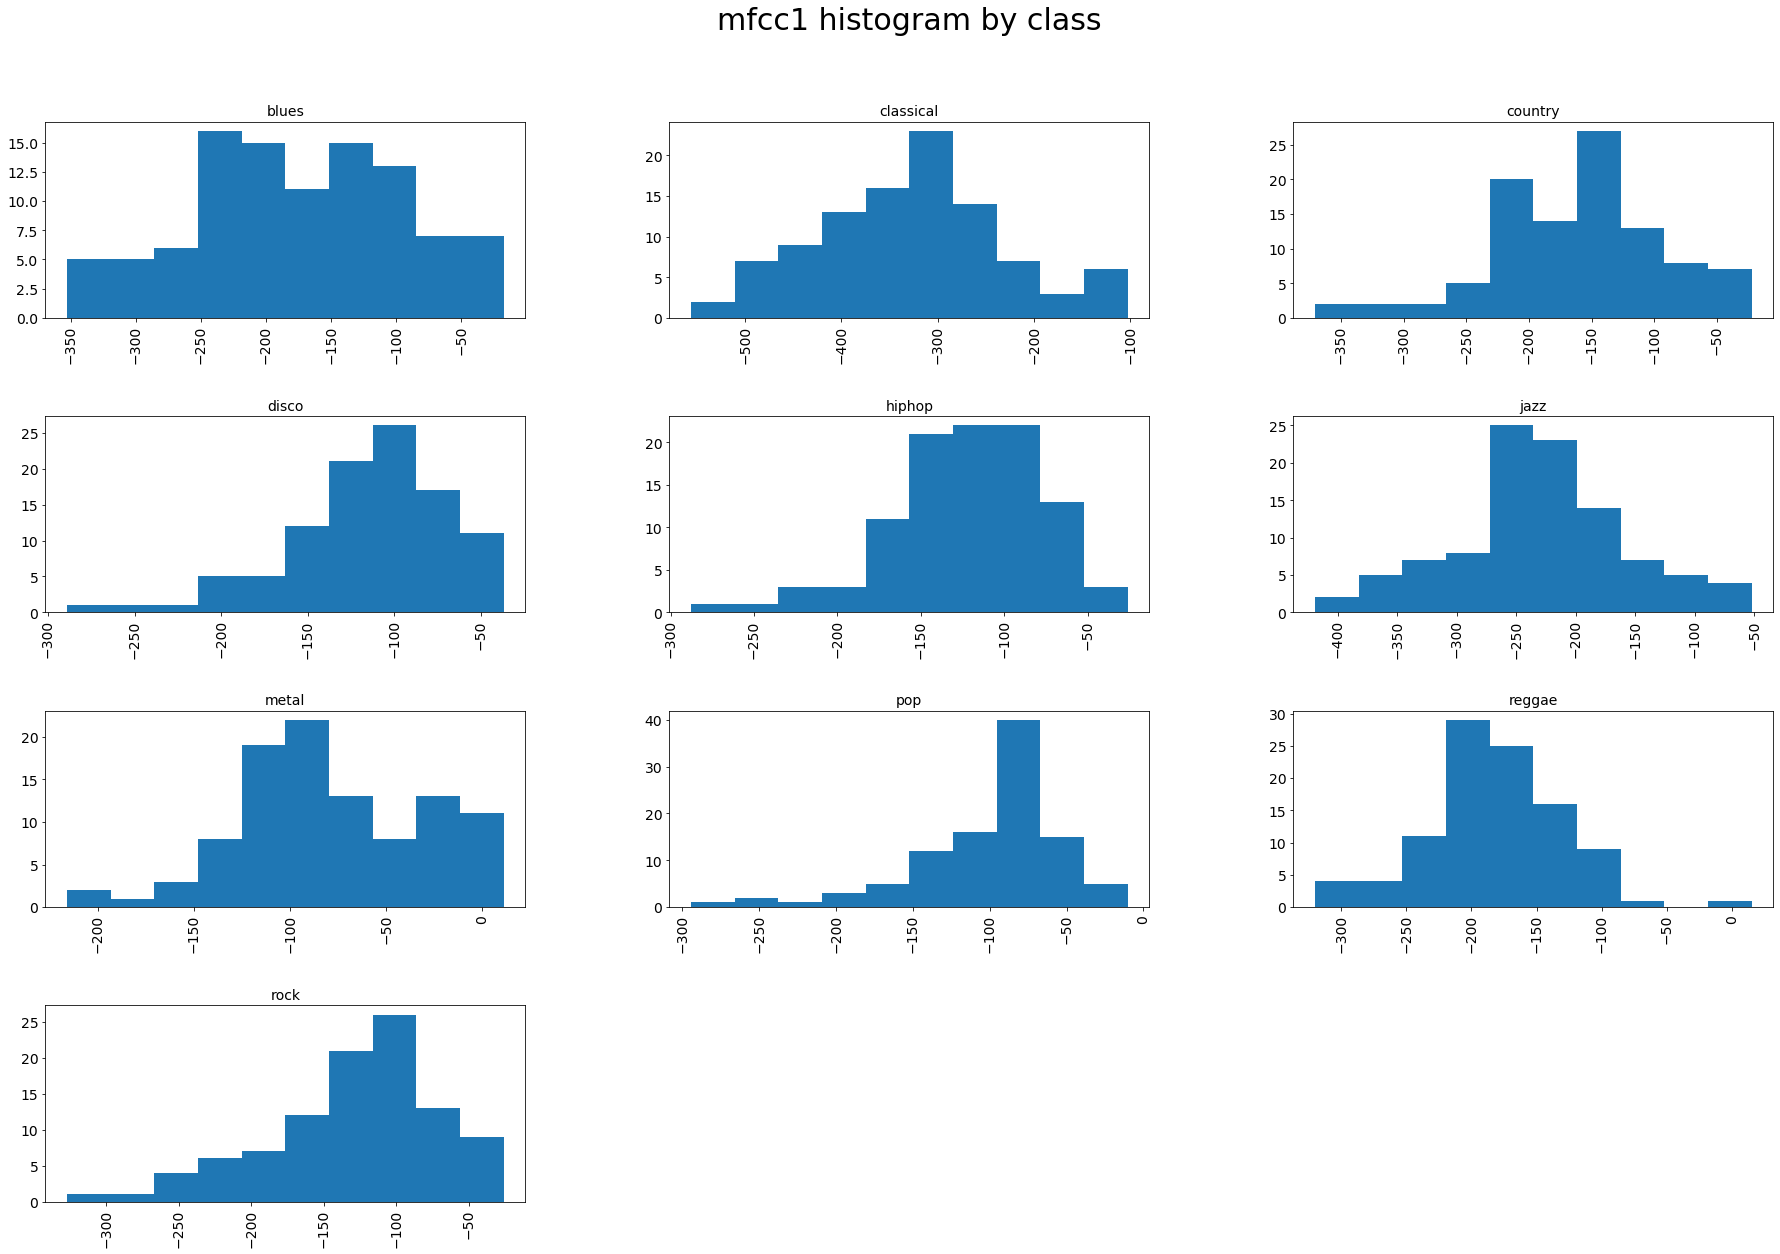

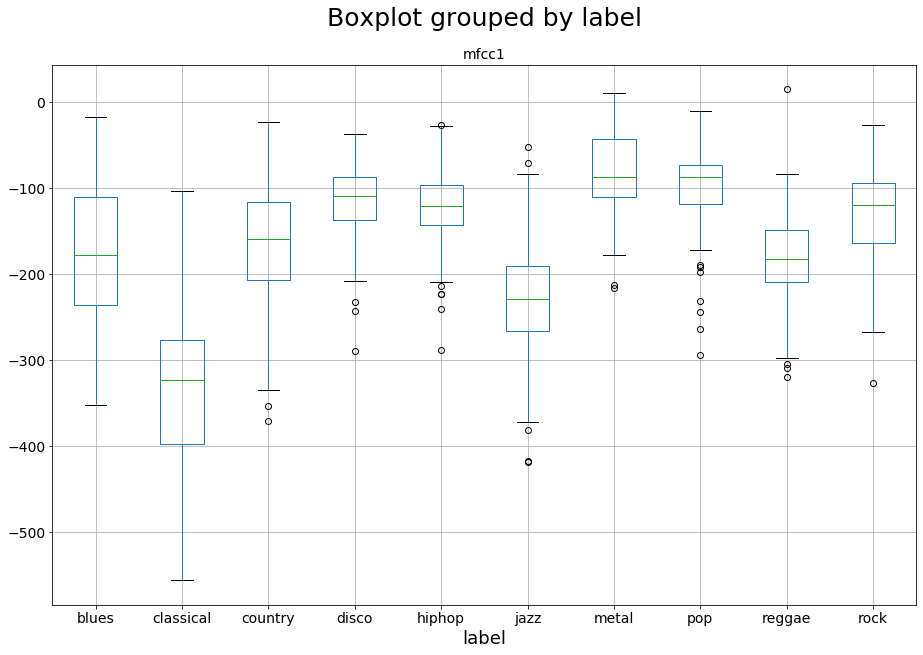

In [21]:
plot_histograms(df, "mfcc1")
plot_boxes(df, "mfcc1")

#### Cluster Analysis

We believe that classification is the correct approach to this dataset, but in order to confirm this hypothesis let's verify the Hopkins score in order to determine the cluster tendency of the dataset. The closer the value to 1, the higher the likelihood of clusters (minimum value is 0).

source: https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-cluster-tendency/

In [23]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

from sklearn import preprocessing

X = df.drop(["label", "filename"], axis=1).values

std_scale = preprocessing.StandardScaler().fit(X) # applying feature scaling because PCA uses euclidean distance to ocompute clusters

X = std_scale.transform(X)

y = df["label"].values


def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins_score = hopkins(X)

print("Hopkins score: %d" % hopkins_score)

Hopkins score: 0


The Hopkins score being 0, it's unlikely the dataset has a tendency for clusters.

Let us further this conclusion using KMeans in order to plot the Elbow Method and Silhouette Score for our data.

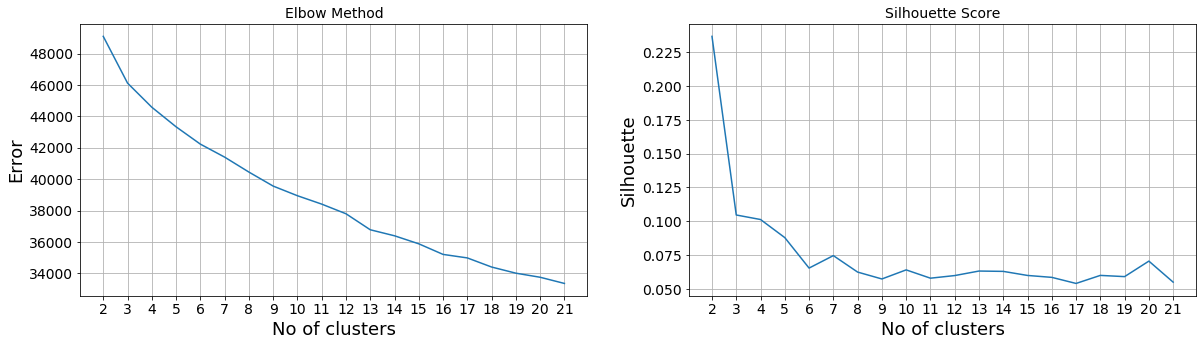

In [24]:
from sklearn import cluster, metrics
     
scores = {}
    
start_range = 2
end_range = 22

for i in range(start_range,end_range):
    km = cluster.KMeans(i)
    km.fit(X)
    
    error = km.inertia_
    s_score = metrics.silhouette_score(X, km.labels_)
    
    scores[i] = {"silhouette": s_score, "error": error} 
    
fig, ax = plt.subplots(1, 2, figsize=(20,5))


ax[0].plot(range(start_range,end_range), [v["error"] for v in scores.values()])

ax[0].set_xticks(range(start_range,end_range))
ax[0].set_title("Elbow Method")
ax[0].set_xlabel("No of clusters")
ax[0].set_ylabel("Error")
ax[0].grid()


ax[1].plot(range(start_range,end_range), [v["silhouette"] for v in scores.values()])

ax[1].set_xticks(range(start_range,end_range))
ax[1].set_title("Silhouette Score")
ax[1].set_xlabel("No of clusters")
ax[1].set_ylabel("Silhouette")
ax[1].grid()


We are supposed to have 10 different genres in our dataset, however here the silhouette and the elbow method indicate that the best number of clusters is between 2 and 4, which is different from the genre groups.

Additionnaly, maximum silhouette score (for k = 2) is around 0.28 which is quite low since in theory Silhouette  is between -1 and 1 (1 meaning that the clusters are dense and well separated, 0 that the clusters are overlapping and -1 that data belong to the wrong clusters).

The dataset clearly does not seem to have a single clear cluster for each music genre. 

Our hypothesis is confirmed :

**Classification seems to be the correct approach to this dataset.**

### Classification algorithms

In order to drive our approach, let us look at the following sheet provided by the scikit-learn documentation.

![model_path](./docs/ScikitLearn_cheat_sheet.png)

Let us begin by studying the Linear SVC approach.

#### Linear SVC

The linear SVC model is a SVM or support vector machine. "Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection."

The LSCV is "capable of performing binary and multi-class classification on a dataset."

(https://scikit-learn.org/stable/modules/svm.html)

In [28]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

print(df.shape)
print(df.head())

(1000, 66)
          filename  chroma_stft      rmse  spectral_centroid  \
0  blues.00000.mp3     0.352233  0.124096        1672.532577   
1  blues.00001.mp3     0.341906  0.091481        1397.267065   
2  blues.00002.mp3     0.365406  0.167401        1469.790929   
3  blues.00003.mp3     0.405791  0.134259         996.203757   
4  blues.00004.mp3     0.311371  0.087446        1744.625063   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         1814.028373  3561.620130            0.084776 -124.778435   
1         1853.440899  3137.556028            0.056902 -217.422363   
2         1591.443680  2864.866010            0.077579 -102.581207   
3         1431.448455  2040.720993            0.034160 -205.863174   
4         1600.255520  3415.221015            0.104678 -171.341095   

        mfcc2      mfcc3  ...      cont6      cont7  spectram_flatness  \
0  132.805542 -30.837690  ...  23.591656  43.607252           0.000532   
1  133.360397   0.853557  ...  25.2

In [29]:
#X and Y creation

X = df.drop(["label", "filename"], axis=1).values

y = df[['label']].values

#data splitting
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = True)



# Data normalization
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
lsvc = LinearSVC(max_iter=100000)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


Score:  0.63
CV average score: 0.52
              precision    recall  f1-score   support

       blues       0.43      0.67      0.52        18
   classical       0.94      0.84      0.89        19
     country       0.58      0.68      0.62        22
       disco       0.48      0.59      0.53        17
      hiphop       0.69      0.69      0.69        16
        jazz       0.83      0.65      0.73        23
       metal       0.87      0.65      0.74        20
         pop       0.74      0.81      0.77        21
      reggae       0.65      0.46      0.54        24
        rock       0.32      0.30      0.31        20

    accuracy                           0.63       200
   macro avg       0.65      0.63      0.63       200
weighted avg       0.66      0.63      0.63       200



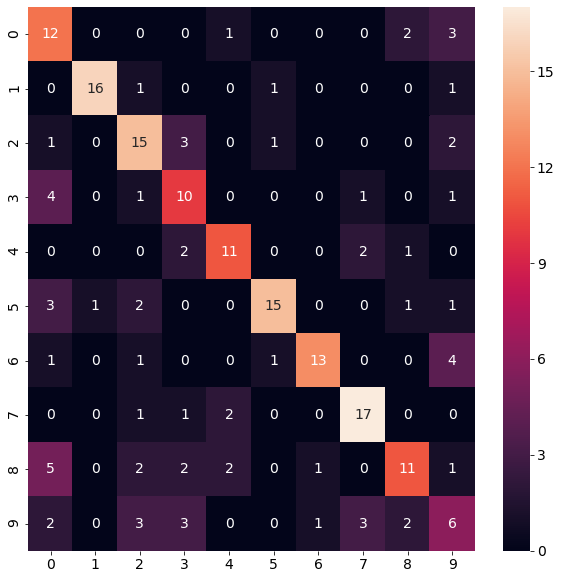

In [33]:
lsvc.fit(X_train, y_train.ravel())

score = lsvc.score(X_test, y_test.ravel())
print("Score: ", score)

cv_scores = cross_val_score(lsvc, X_test, y_test.ravel(), cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(X_test)

cr = classification_report(y_test, ypred)
print(cr)


from ml_toolbox import show_confusion_matrix
show_confusion_matrix(y_test, ypred)

We obtain our first score : 63% accuracy. Let us see if we can improve this score by running feature selection using a RandomForestRegressor.

In [34]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.08774095 0.01752952 0.01580991 0.02990894 0.0280261  0.01292754
 0.01276906 0.01637794 0.01772967 0.0238121  0.01785349 0.01312252
 0.00936054 0.02477357 0.02239985 0.0136654  0.01206574 0.02826299
 0.01185218 0.01929497 0.01350634 0.0073114  0.01430344 0.01283169
 0.01435794 0.00920744 0.00788102 0.00720612 0.00607257 0.01696292
 0.00979699 0.01463279 0.00729441 0.00555663 0.00850175 0.00869828
 0.01179553 0.01042747 0.00764283 0.00808399 0.00771717 0.00931144
 0.00739974 0.00677443 0.00611324 0.00677439 0.00795787 0.00661449
 0.00864514 0.00807751 0.01812802 0.01861036 0.01363455 0.01586319
 0.08533089 0.03262638 0.00988996 0.03821777 0.01245082 0.00938698
 0.00740367 0.00799453 0.00794434 0.00977859]
[33 28 44 47 45 43 27 32 21 42 60 38 40 26 62 46 61 49 39 34 48 35 25 41
 12 59 63 30 56 37 36 18 16 58  6 23  5 11 20 52 15 22 24 31  2 53  7 29
  1  8 10 50 51 19 14  9 13  4 17  3 55 57 54  0]


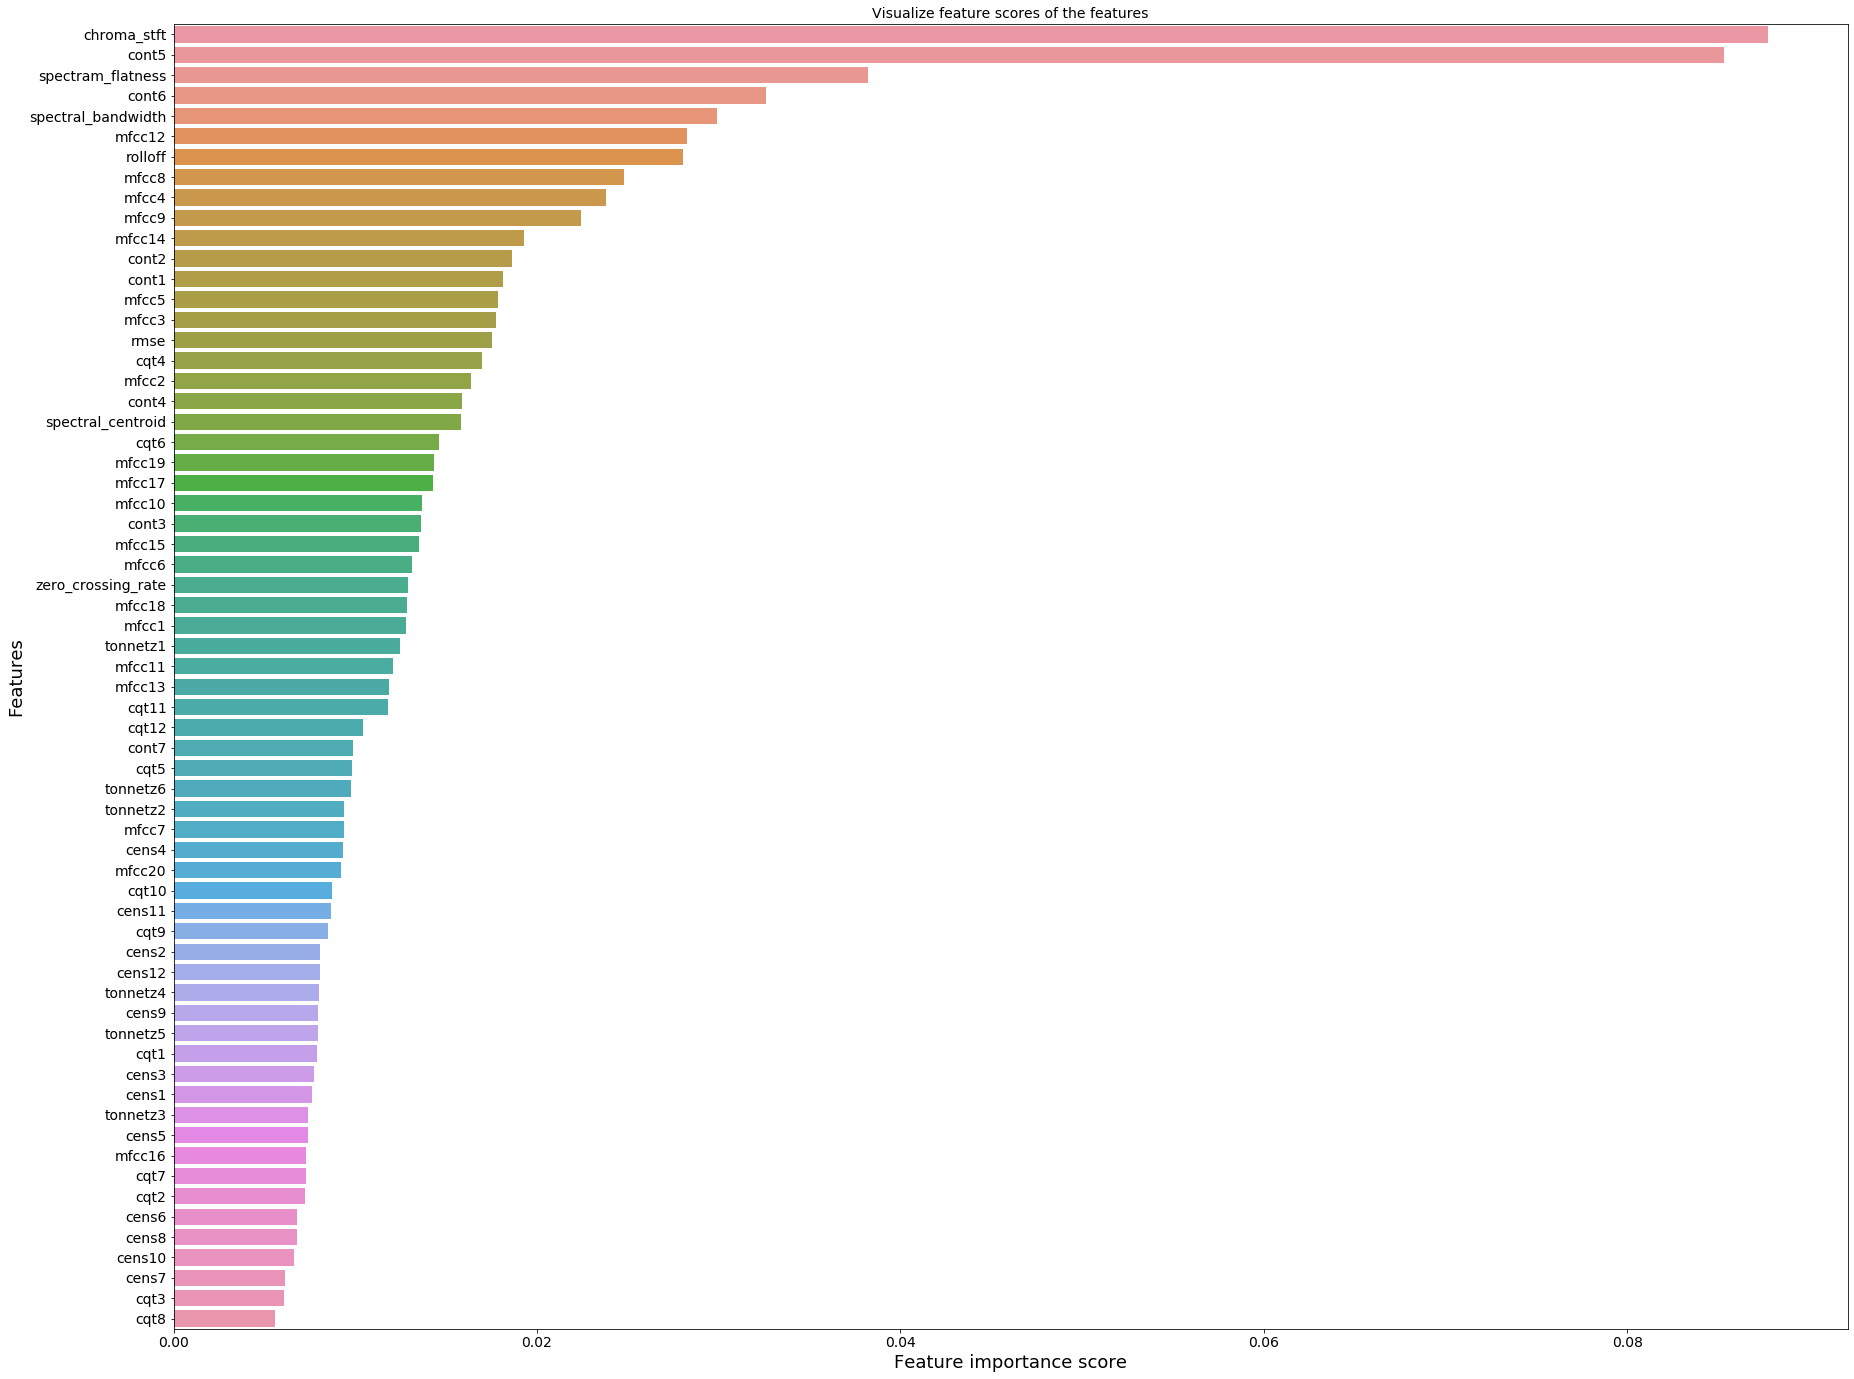

In [36]:
encoder = preprocessing.LabelEncoder()
encoder.fit(y)

y_encoded = encoder.transform(y)

#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, shuffle = True)

# Data normalization
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train.ravel())
rf.feature_importances_
print(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()

print(sorted_idx)

# view the feature scores
feature_scores = pd.Series(rf.feature_importances_, index=['chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
                'mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16',
                'mfcc17','mfcc18','mfcc19','mfcc20', 'cqt1','cqt2','cqt3','cqt4','cqt5','cqt6','cqt7','cqt8','cqt9','cqt10','cqt11','cqt12',
                'cens1','cens2','cens3','cens4','cens5','cens6','cens7','cens8','cens9','cens10','cens11','cens12',
                'cont1','cont2','cont3','cont4','cont5','cont6','cont7','spectram_flatness', 'tonnetz1','tonnetz2','tonnetz3','tonnetz4','tonnetz5','tonnetz6',]).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [37]:
print(feature_scores.index)

Index(['chroma_stft', 'cont5', 'spectram_flatness', 'cont6',
       'spectral_bandwidth', 'mfcc12', 'rolloff', 'mfcc8', 'mfcc4', 'mfcc9',
       'mfcc14', 'cont2', 'cont1', 'mfcc5', 'mfcc3', 'rmse', 'cqt4', 'mfcc2',
       'cont4', 'spectral_centroid', 'cqt6', 'mfcc19', 'mfcc17', 'mfcc10',
       'cont3', 'mfcc15', 'mfcc6', 'zero_crossing_rate', 'mfcc18', 'mfcc1',
       'tonnetz1', 'mfcc11', 'mfcc13', 'cqt11', 'cqt12', 'cont7', 'cqt5',
       'tonnetz6', 'tonnetz2', 'mfcc7', 'cens4', 'mfcc20', 'cqt10', 'cens11',
       'cqt9', 'cens2', 'cens12', 'tonnetz4', 'cens9', 'tonnetz5', 'cqt1',
       'cens3', 'cens1', 'tonnetz3', 'cens5', 'mfcc16', 'cqt7', 'cqt2',
       'cens6', 'cens8', 'cens10', 'cens7', 'cqt3', 'cqt8'],
      dtype='object')


Let us drop all features after the spectral centroid and see if our accuracy improves.

In [47]:
#X and Y creation

X = df.drop(["label", "filename",'cqt6', 'mfcc19', 'mfcc17', 'mfcc10',
       'cont3', 'mfcc15', 'mfcc6', 'zero_crossing_rate', 'mfcc18', 'mfcc1',
       'tonnetz1', 'mfcc11', 'mfcc13', 'cqt11', 'cqt12', 'cont7', 'cqt5',
       'tonnetz6', 'tonnetz2', 'mfcc7', 'cens4', 'mfcc20', 'cqt10', 'cens11',
       'cqt9', 'cens2', 'cens12', 'tonnetz4', 'cens9', 'tonnetz5', 'cqt1',
       'cens3', 'cens1', 'tonnetz3', 'cens5', 'mfcc16', 'cqt7', 'cqt2',
       'cens6', 'cens8', 'cens10', 'cens7', 'cqt3', 'cqt8' ], axis=1).values

y = df[['label']].values

#data splitting
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = True)



# Data normalization
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Score:  0.665
CV average score: 0.57
              precision    recall  f1-score   support

       blues       0.62      0.65      0.63        20
   classical       0.88      0.92      0.90        25
     country       0.54      0.59      0.57        22
       disco       0.50      0.59      0.54        22
      hiphop       0.82      0.78      0.80        18
        jazz       0.71      0.63      0.67        19
       metal       0.78      0.90      0.84        20
         pop       0.73      1.00      0.84        16
      reggae       0.62      0.31      0.42        16
        rock       0.38      0.27      0.32        22

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.67      0.65       200



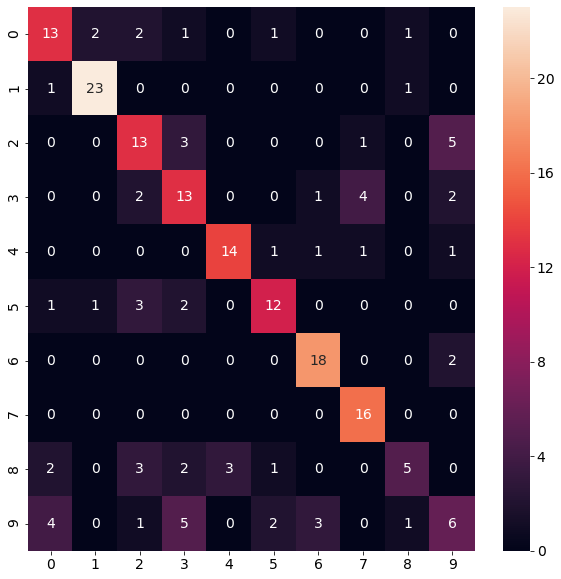

In [48]:
lsvc.fit(X_train, y_train.ravel())

score = lsvc.score(X_test, y_test.ravel())
print("Score: ", score)

cv_scores = cross_val_score(lsvc, X_test, y_test.ravel(), cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(X_test)

cr = classification_report(y_test, ypred)
print(cr)


from ml_toolbox import show_confusion_matrix
show_confusion_matrix(y_test, ypred)

After a few iterations, we manage to get a slightly higher score of 66%.

An interesting first approach, but let us further our path along the sci-kit learn sheet and implement a KNN model.

#### K Nearest Neighbors

"Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value k  is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct." 

(https://scikit-learn.org/stable/modules/neighbors.html)



The major difference between the LSVC approach and the KNN approach is that the KNN model depends on the value of parameter k as well as feature importance. **We will be using the feature scores precedently obtained using our random forest regressor combined with a function we have coded to determine the optimal combination between number of neighbors and best features.**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from ml_toolbox import show_confusion_matrix

In [50]:
X = df.drop(["label", "filename"], axis=1).values


y = df["label"].values

def findmymodel(X, y, n_neighbors):
    
  

    encoder = preprocessing.LabelEncoder()
    encoder.fit(y)

    y_encoded = encoder.transform(y)

    #data splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, shuffle = True)

    # Data normalization
    scaler = StandardScaler()
    scaler.fit(X)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    knn_v3 = KNeighborsClassifier(n_neighbors)
    
    knn_v3.fit(X_train, y_train.ravel())
    
    train_score = knn_v3.score(X_train, y_train.ravel()) # accuracy
    test_score = knn_v3.score(X_test, y_test.ravel()) # accuracy
    
    return {"train_accuracy": train_score, "test_accuracy": test_score, "number_features": X.shape[1]} 

Number of neighbors :  1
Best score: 0.68, with 36 features


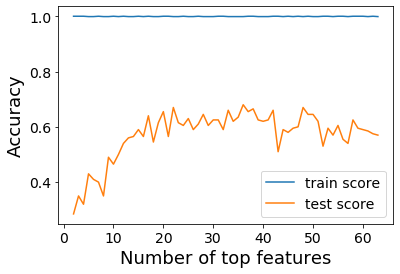

Number of neighbors :  2
Best score: 0.64, with 31 features


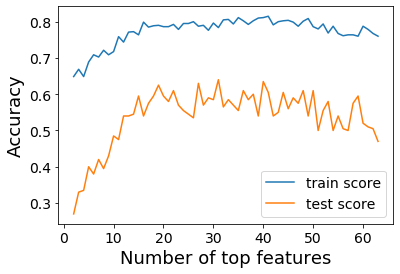

Number of neighbors :  3
Best score: 0.68, with 34 features


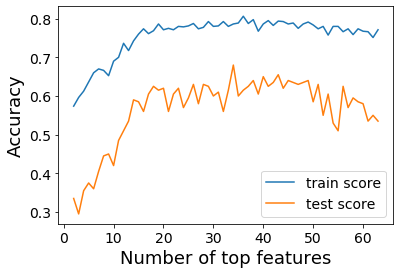

Number of neighbors :  4
Best score: 0.7, with 37 features


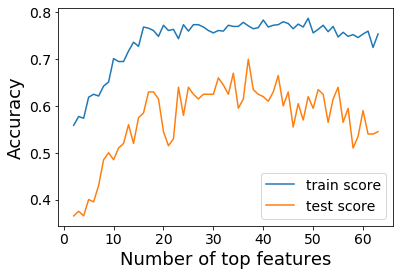

Number of neighbors :  5
Best score: 0.685, with 46 features


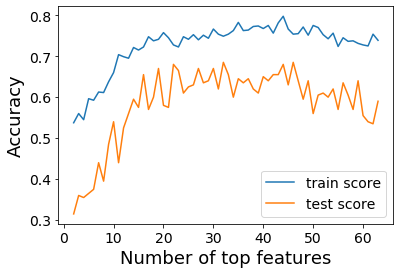

Number of neighbors :  6
Best score: 0.695, with 39 features


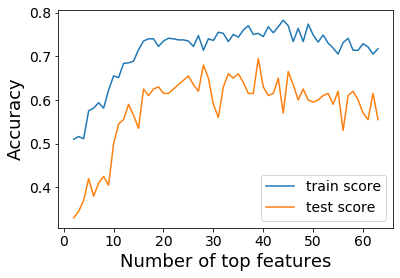

Number of neighbors :  7
Best score: 0.69, with 34 features


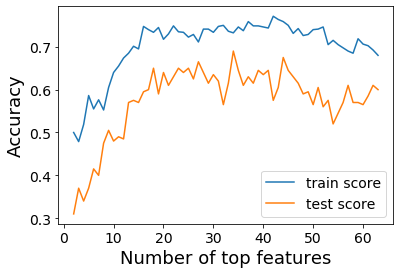

Number of neighbors :  8
Best score: 0.695, with 43 features


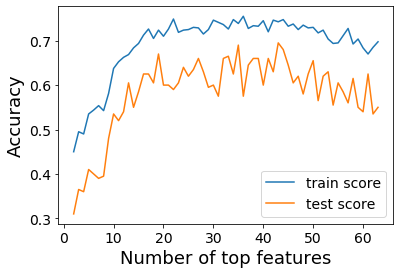

Number of neighbors :  9
Best score: 0.72, with 32 features


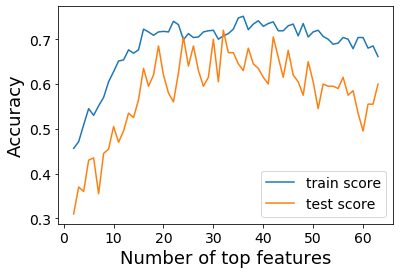

Number of neighbors :  10
Best score: 0.69, with 33 features


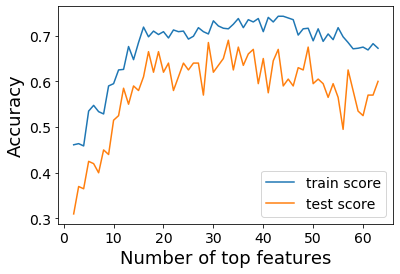

Number of neighbors :  11
Best score: 0.69, with 39 features


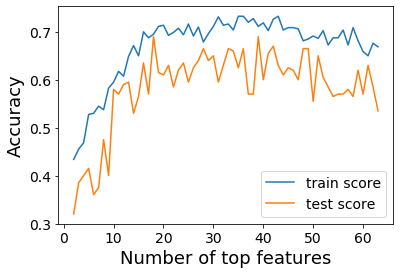

Number of neighbors :  12
Best score: 0.695, with 32 features


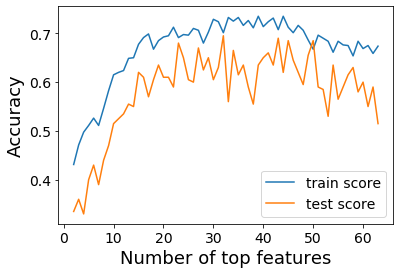

Number of neighbors :  13
Best score: 0.715, with 35 features


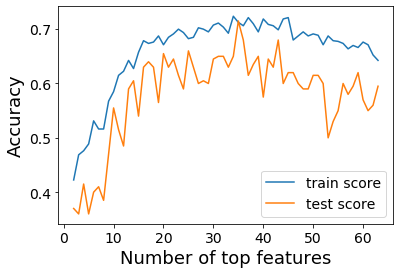

Number of neighbors :  14
Best score: 0.685, with 34 features


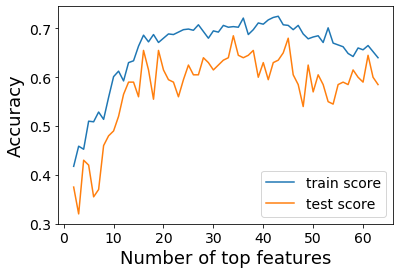

Number of neighbors :  15
Best score: 0.69, with 33 features


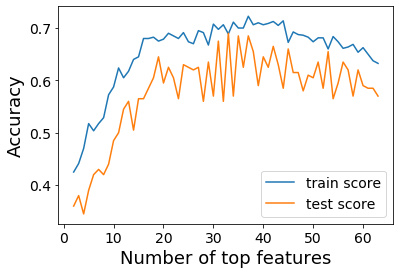

Number of neighbors :  16
Best score: 0.7, with 25 features


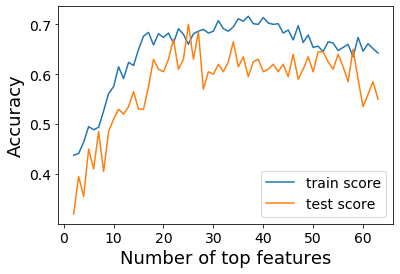

Number of neighbors :  17
Best score: 0.71, with 38 features


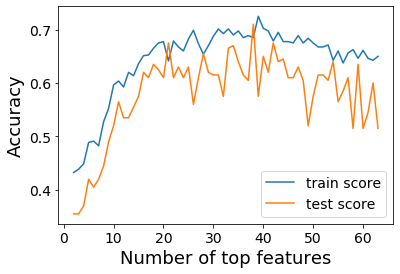

Number of neighbors :  18
Best score: 0.675, with 34 features


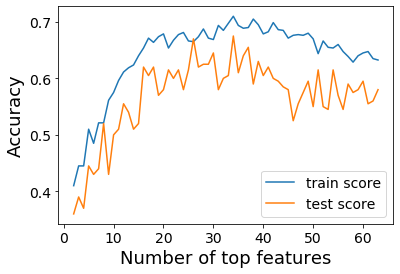

Number of neighbors :  19
Best score: 0.675, with 42 features


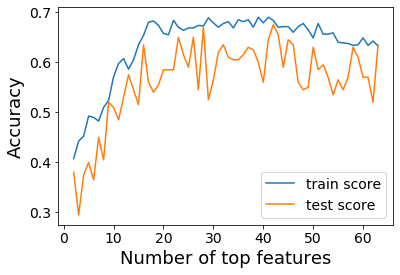

Number of neighbors :  20
Best score: 0.655, with 58 features


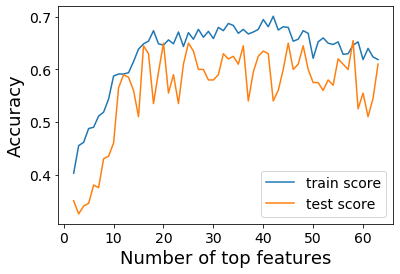

In [51]:
for n_neighbors in range (1,21):
    y = df[['label']].values

    results = []
    features_range = range(2, len(feature_scores.index))
    for i in features_range:
        X = df[list(feature_scores.index)[:i]]
        scores = findmymodel(X, y.ravel(), n_neighbors)
        results.append(scores)
        
    %matplotlib inline

    train_score_results = [r["train_accuracy"] for r in results]
    test_score_results = [r["test_accuracy"] for r in results]
    nb_feature_results = [r["number_features"] for r in results]

    plt.plot(features_range, train_score_results, label="train score")
    plt.plot(features_range, test_score_results, label="test score")



    max_result = max(test_score_results)

    for i in range(len(test_score_results)):
        if test_score_results[i] == max_result:
            best_nb_features = nb_feature_results[i]

    
    print("Number of neighbors : ", n_neighbors)
    print(f"Best score: {max_result}, with {best_nb_features} features")


    plt.xlabel('Number of top features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

The best result we get is the following :

Number of neighbors :  **9**

Best score: **0.72**, with 32 features

Let us see what those 32 features are and recreate the best model.

In [52]:
print(feature_scores.index)
print(feature_scores.index[32])

Index(['chroma_stft', 'cont5', 'spectram_flatness', 'cont6',
       'spectral_bandwidth', 'mfcc12', 'rolloff', 'mfcc8', 'mfcc4', 'mfcc9',
       'mfcc14', 'cont2', 'cont1', 'mfcc5', 'mfcc3', 'rmse', 'cqt4', 'mfcc2',
       'cont4', 'spectral_centroid', 'cqt6', 'mfcc19', 'mfcc17', 'mfcc10',
       'cont3', 'mfcc15', 'mfcc6', 'zero_crossing_rate', 'mfcc18', 'mfcc1',
       'tonnetz1', 'mfcc11', 'mfcc13', 'cqt11', 'cqt12', 'cont7', 'cqt5',
       'tonnetz6', 'tonnetz2', 'mfcc7', 'cens4', 'mfcc20', 'cqt10', 'cens11',
       'cqt9', 'cens2', 'cens12', 'tonnetz4', 'cens9', 'tonnetz5', 'cqt1',
       'cens3', 'cens1', 'tonnetz3', 'cens5', 'mfcc16', 'cqt7', 'cqt2',
       'cens6', 'cens8', 'cens10', 'cens7', 'cqt3', 'cqt8'],
      dtype='object')
mfcc13


All features up to mfcc13 excluded are to be kept.

In [54]:
X = df.drop(["label", "filename",'mfcc13', 'cqt11', 'cqt12', 'cont7', 'cqt5',
       'tonnetz6', 'tonnetz2', 'mfcc7', 'cens4', 'mfcc20', 'cqt10', 'cens11',
       'cqt9', 'cens2', 'cens12', 'tonnetz4', 'cens9', 'tonnetz5', 'cqt1',
       'cens3', 'cens1', 'tonnetz3', 'cens5', 'mfcc16', 'cqt7', 'cqt2',
       'cens6', 'cens8', 'cens10', 'cens7', 'cqt3', 'cqt8'], axis=1).values


y = df["label"].values

Train set Accuracy: 0.72
Test set Accuracy: 0.70
--- Classification Report ---
              precision    recall  f1-score   support

       blues       0.86      0.83      0.84        23
   classical       0.88      0.91      0.89        23
     country       0.54      0.68      0.60        19
       disco       0.70      0.72      0.71        29
      hiphop       0.61      0.52      0.56        21
        jazz       0.76      0.59      0.67        22
       metal       0.73      0.85      0.79        13
         pop       0.65      0.72      0.68        18
      reggae       0.53      0.69      0.60        13
        rock       0.69      0.47      0.56        19

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.71      0.70      0.70       200

Class 0: blues
Class 1: classical
Class 2: country
Class 3: disco
Class 4: hiphop
Class 5: jazz
Class 6: metal
Class 7: pop
Class 8: reggae
Class 9: rock


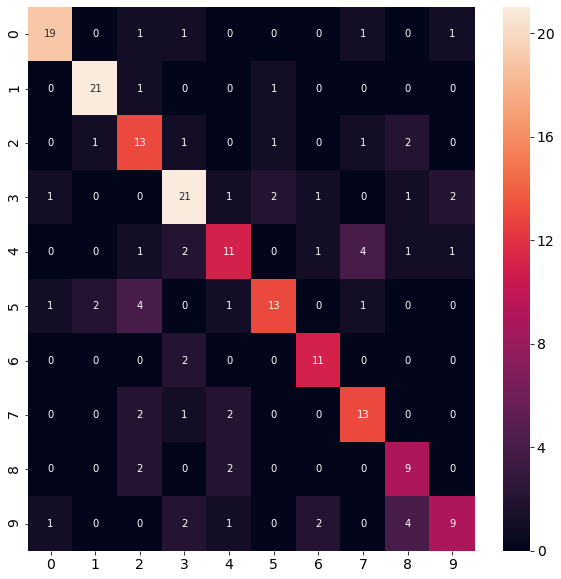

In [74]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = True)

# Data normalization
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


n_neighbors = 9
knn_v4 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_v4.fit(X_train, y_train.ravel())

train_score = knn_v4.score(X_train, y_train.ravel()) # accuracy

print("Train set Accuracy: %.2f" % train_score)

test_score = knn_v4.score(X_test, y_test.ravel()) # accuracy

print("Test set Accuracy: %.2f" % test_score)


ypred = knn_v4.predict(X_test)

cr = classification_report(y_test, ypred)

print("--- Classification Report ---")
print(cr) 

encoder = preprocessing.LabelEncoder()
encoder.fit(y)

show_confusion_matrix(y_test, ypred, encoder)

After a few iteration we manage to recreate a similar model, with our highest score yet : **70%**

The model is really good at identifying classical (0.88), but still struggles with reggae for instance (0.53).

Let us now see if we can further improve this score with dimension reduction.

We will observe the results of two different dimension reduction techniques : PCA (Primary Component Analysis) and NCA (Neighborhood Component Analysis). We will be trying each method for 2 to 20 dimensions and see if we can improve our score.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



encoder = preprocessing.LabelEncoder()
encoder.fit(y)

y = encoder.transform(y)

dim = len(X[0])
n_classes = len(np.unique(y))

n_neighbors = 9
random_state = 0


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, shuffle = True)

# Data normalization
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Nb Dimensions : 2


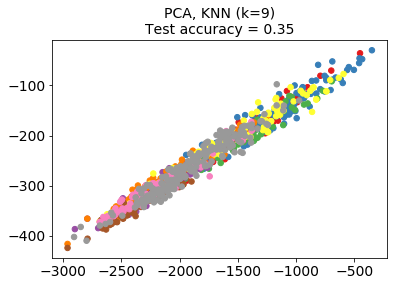

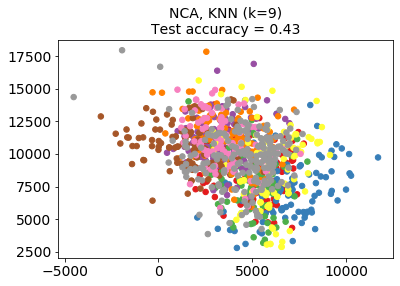

Nb Dimensions : 3


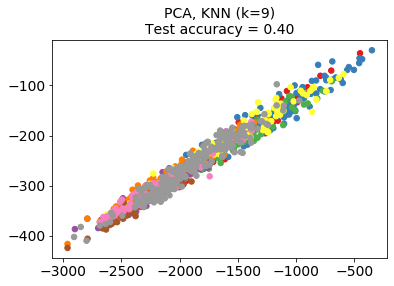

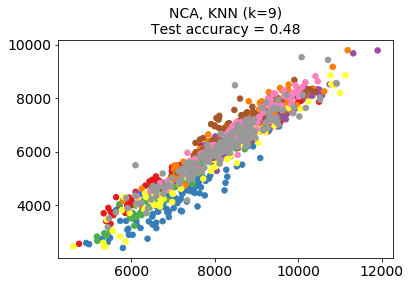

Nb Dimensions : 4


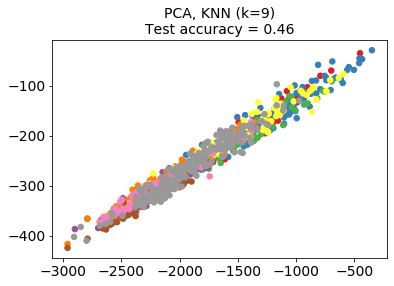

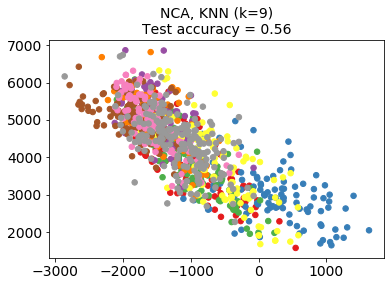

Nb Dimensions : 5


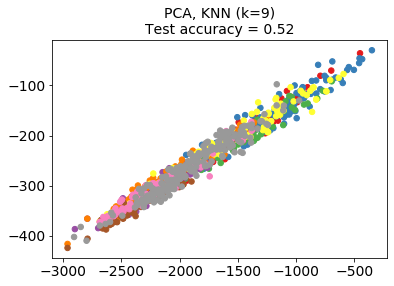

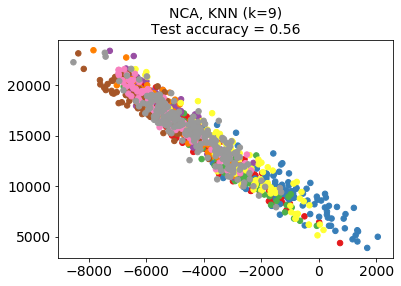

Nb Dimensions : 6


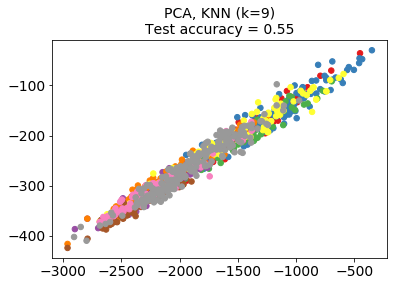

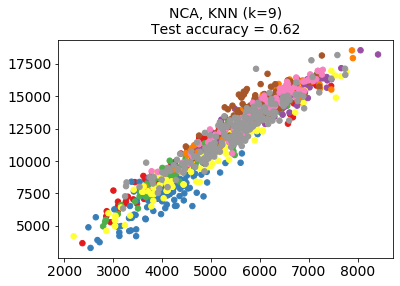

Nb Dimensions : 7


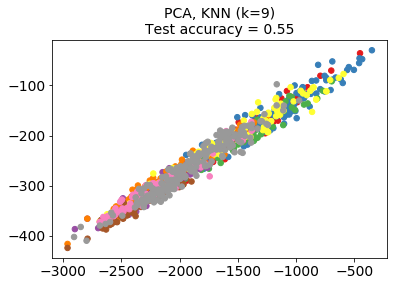

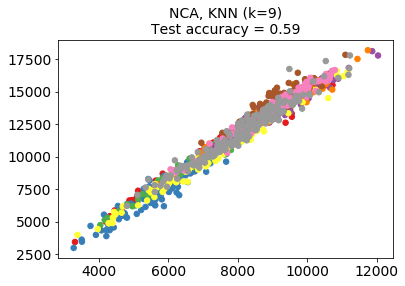

Nb Dimensions : 8


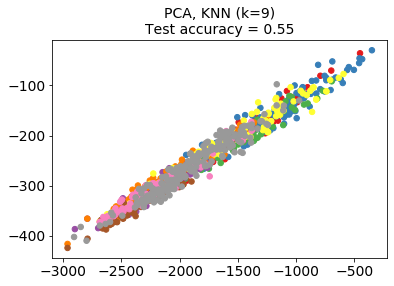

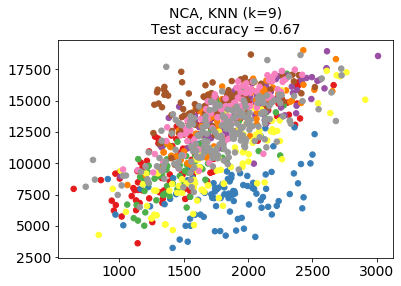

Nb Dimensions : 9


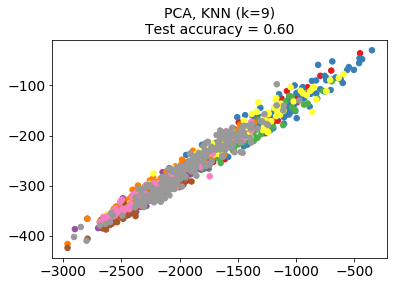

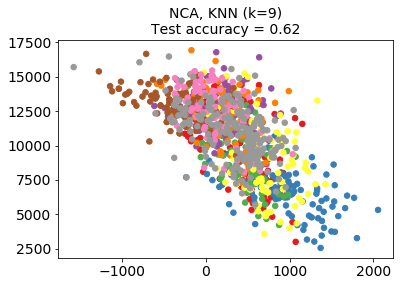

Nb Dimensions : 10


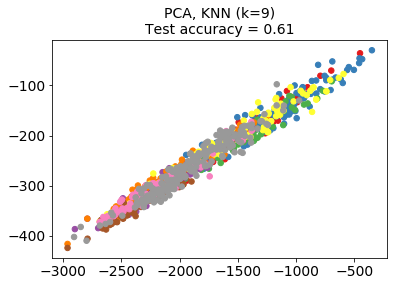

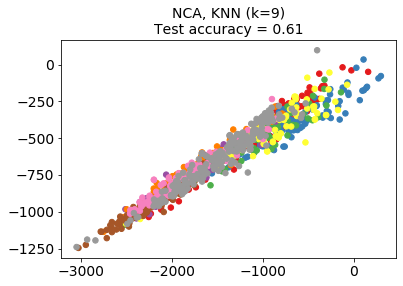

Nb Dimensions : 11


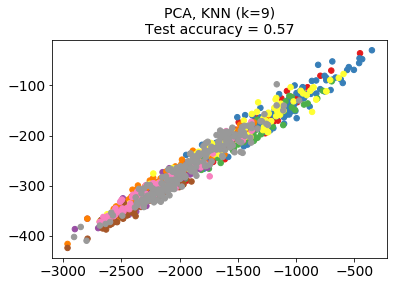

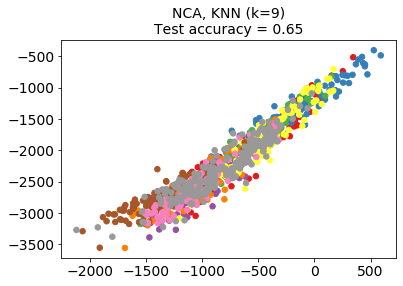

Nb Dimensions : 12


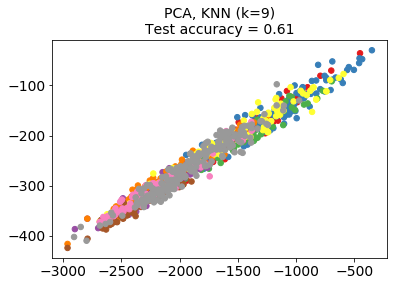

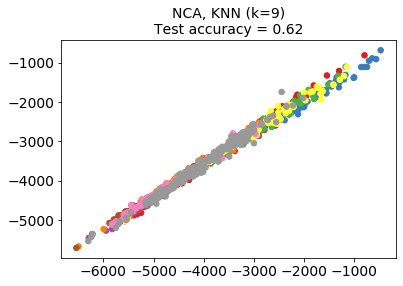

Nb Dimensions : 13


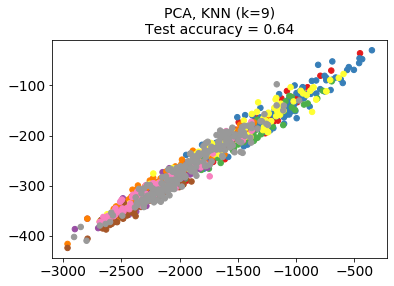

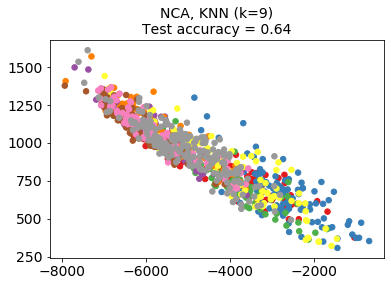

Nb Dimensions : 14


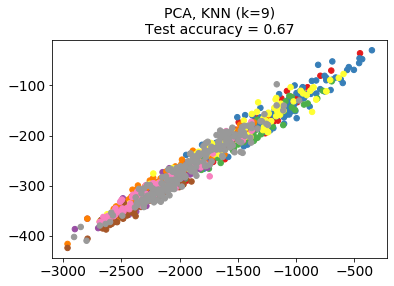

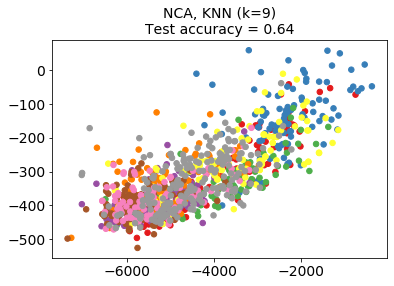

Nb Dimensions : 15


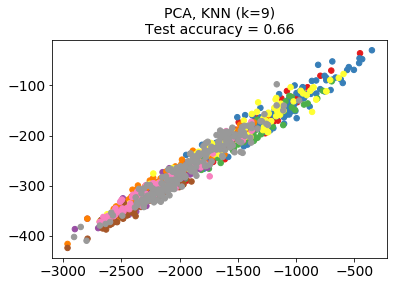

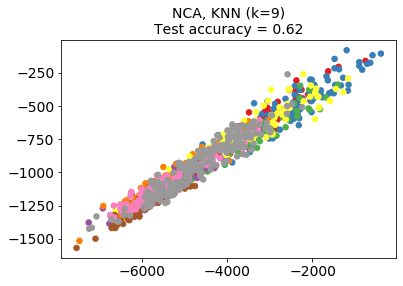

Nb Dimensions : 16


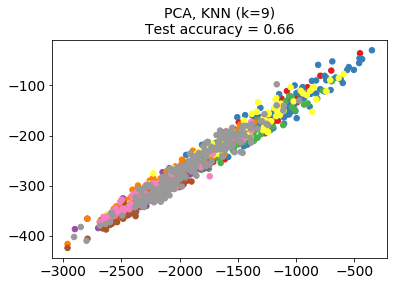

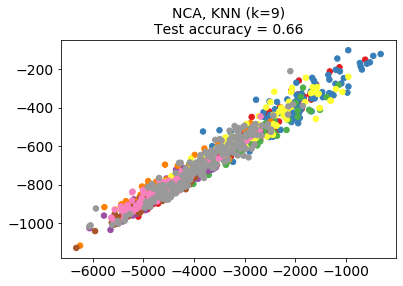

Nb Dimensions : 17


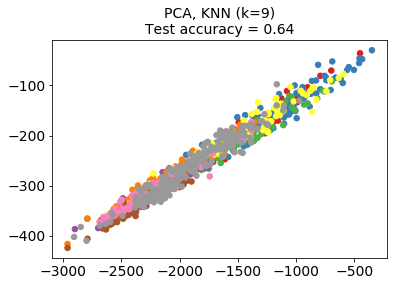

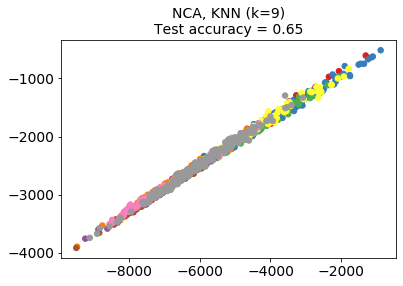

Nb Dimensions : 18


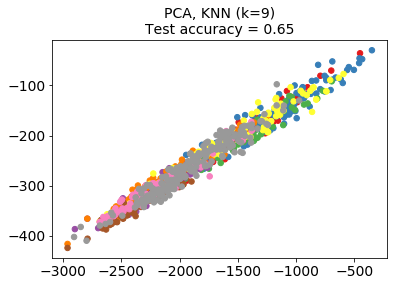

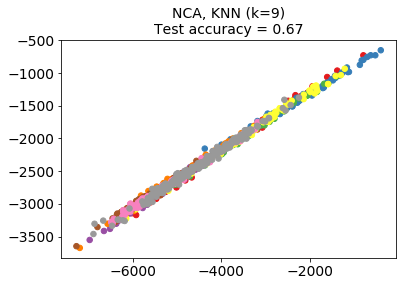

Nb Dimensions : 19


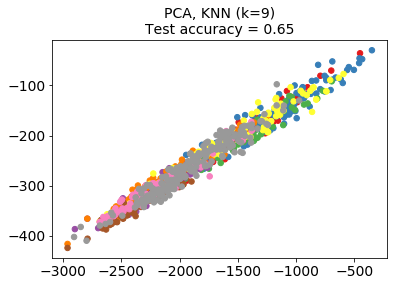

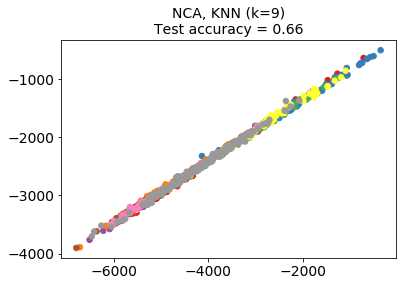

Nb Dimensions : 20


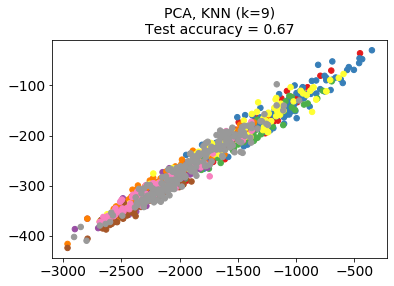

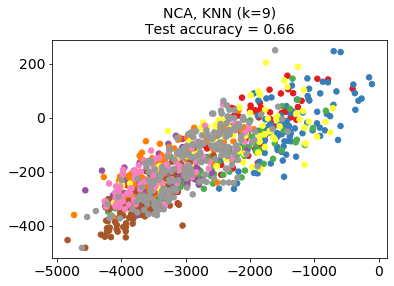

In [76]:
for ncomp in range (2,21) :
    # Reduce dimension to 2 with PCA
    pca = make_pipeline(StandardScaler(),
                        PCA(n_components=ncomp, random_state=random_state))


    # Reduce dimension to 2 with NeighborhoodComponentAnalysis
    nca = make_pipeline(StandardScaler(),
                        NeighborhoodComponentsAnalysis(n_components=ncomp,
                                                       random_state=random_state))

    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Make a list of the methods to be compared
    dim_reduction_methods = [('PCA', pca),  ('NCA', nca)]

    # plt.figure()


    for i, (name, model) in enumerate(dim_reduction_methods):
        plt.figure()
        # plt.subplot(1, 3, i + 1, aspect=1)

        # Fit the method's model
        model.fit(X_train, y_train)

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(X_train), y_train)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(X_test), y_test)

        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = model.transform(X)

        # Plot the projected points and show the evaluation score
        plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
        plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                                  n_neighbors,
                                                                  acc_knn))
    
    
    print("Nb Dimensions :" , ncomp)
    
    plt.show()

The best score we get is **0.67** , which is less than the one obtained with the precedent approach. Dimension reduction is therefore not useful and the best KNN we have been able to create uses **9** nearest neighbors on **32** out of the 64 features of our dataset. Overall, we've achieved a slight improvement using KNN.

To recap :

- **Linear SVC : 66% accuracy** 
- **KNN : 70% accuracy**

Model accuracy at this point is starting to become satisfactory.
It is now time to present the approach with which we've obtained our best accuracy : the Neural Network Approach.


#### Neural Network

TODO : explain model

In [77]:
from sklearn import preprocessing

X = df.drop(["label", "filename"], axis=1).values

std_scale = preprocessing.StandardScaler().fit(X) # applying feature scaling because PCA uses euclidean distance to ocompute clusters

X = std_scale.transform(X)

y = df["label"].values

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
encoder.fit(y)

y_encoded = encoder.transform(y)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=X.shape[1:]),
    Dense(600, activation="relu"),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(50, activation="tanh"),
    Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", # because classes are exclusive or else we would use  categorical_crossentropy
             optimizer=SGD(learning_rate=0.002), # Stochastic Gradient Descent, will use backpropoagation (reverse mode autodiff + Gradient Descent
             metrics=["accuracy"],)

model.summary()


# callback for early stopiing (add in the model callbacks array)
early_stopping_cb = EarlyStopping(patience=100,  # interupus training early if no progress
                                restore_best_weights=True) # keeps track of best weights to restore them at the end of training


#history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
history = model.fit(X_train, y_train, epochs=600, validation_data=(X_valid, y_valid))

In [ ]:
mse_test = model.evaluate(X_test, y_test)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epoch")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from ml_toolbox import show_confusion_matrix

y_pred_nn = np.argmax(model.predict(X_test), axis=-1)
model.evaluate(X_test, y_test)
show_confusion_matrix(y_test, y_pred_nn, encoder, "Neural Network Confusion Matrix")

Each iteration is different, and by running this code multiple times, we eventually obtained the following results, presented in the picture below. 

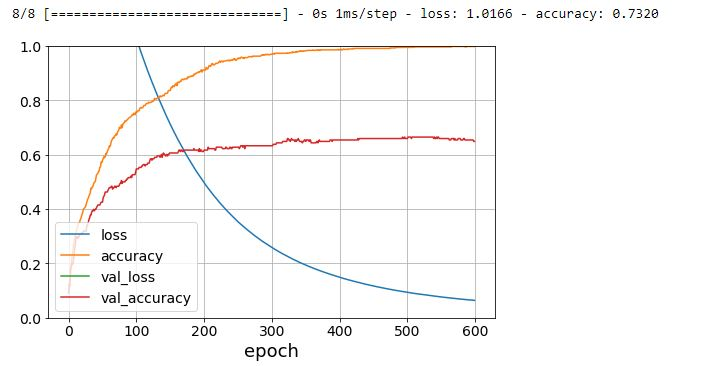
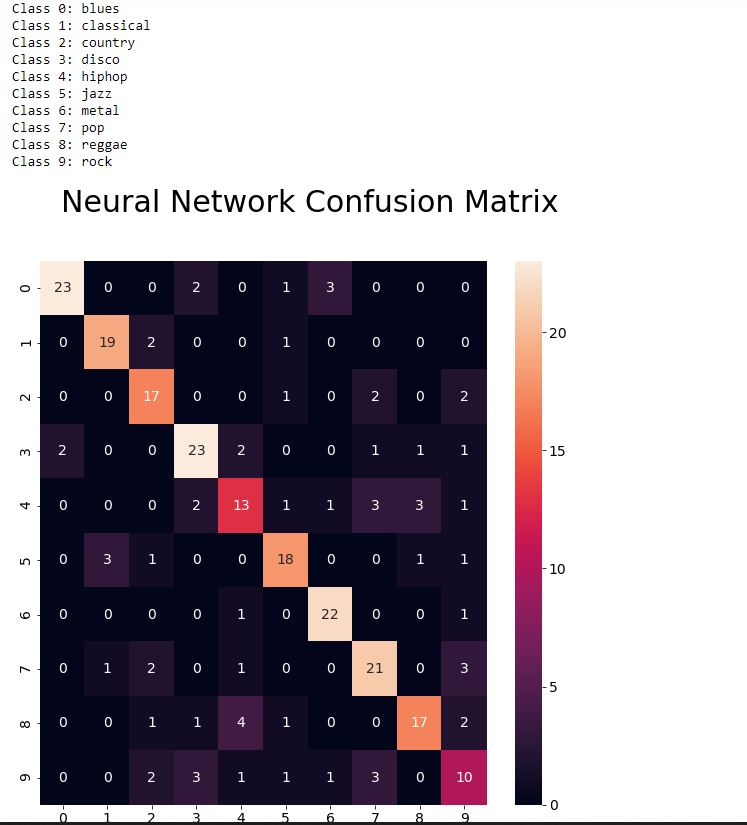

We get an accuracy of **73%**, our best score.

Let us now present another approach we wanted to try out. This time, instead of using the numeric features extracted using Librosa, we decided to use this same library to extract audio spectograms, which are visual. We then created a Convolutional Neural Network or CNN, to try and predict music genre using computer vision on the spectograms.

#### Convolutional Neural Network

TODO : Explain model

In this approach, the feature extraction method is different. 

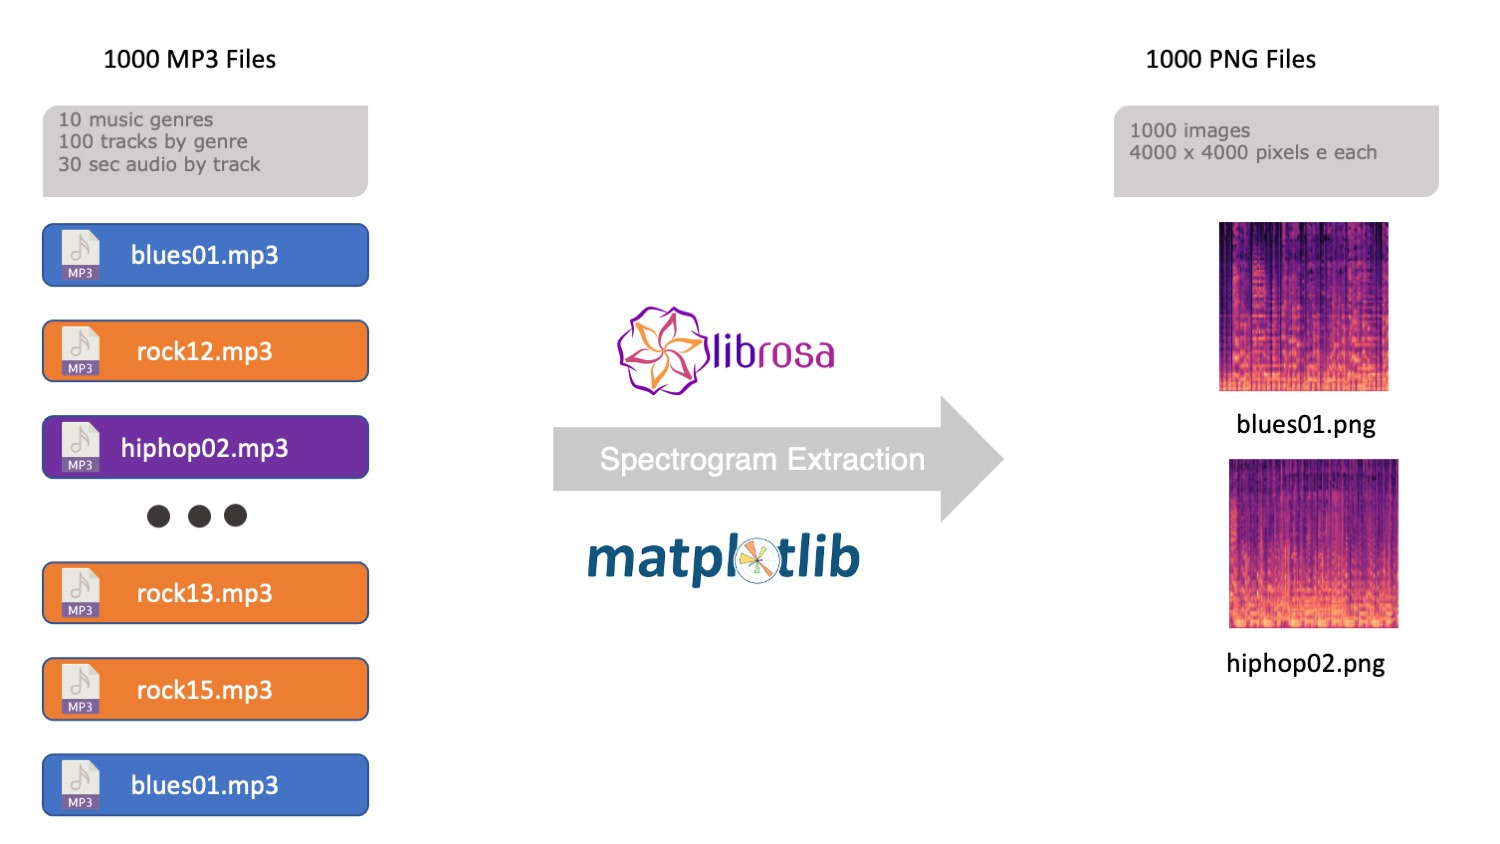

For each audio sample, a spectogram is created and saved using the following code.

In [82]:
import librosa
import librosa.display

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
mp3_dir_path = "./datasets/songs/genres_mp3/"
spectrogram_output_dir = "./datasets/songs/spectrograms_5s/"



# TOOD put each spectrogram in a directory that matches the genre (for keras training)
def create_spectrogram_png(song_file):
    fig, ax = plt.subplots(figsize=(10,10))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

    ax.axis('off')
    ax.axis('off')


    y, sr = librosa.load(song_file, mono=True, offset = 15, duration=5)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                        fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)

    img = librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr,
                             fmax=8000, ax=ax)
    
    
    
    path_split = song_file.replace(mp3_dir_path, "").split("/")
    
    filename = f"{spectrogram_output_dir}{path_split[1]}_spectrogram_FULLSIZE.png"

    # fig.savefig(filename, dpi=400, bbox_inches="tight",pad_inches=0)
    fig.savefig(filename, dpi=400, pad_inches=0,)
    print(f"-> created {filename}")
    plt.close()
    fig.clf()
    plt.close(fig)
    plt.close('all')
    
    del y, sr, fig, ax, S, path_split
    
    return filename

Here is an example of the extracted spectogram.

D:\Anaconda\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


-> created ./datasets/songs/spectrograms_5s/hiphop.00043.mp3_spectrogram_FULLSIZE.png


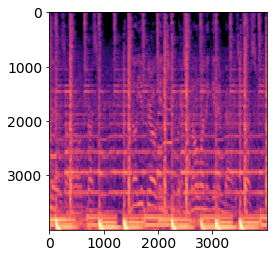

In [83]:
import matplotlib.image as mpimg

song_path = "./datasets/songs/genres_mp3/hiphop/hiphop.00043.mp3"

created_spectrogram_filename = create_spectrogram_png(song_path)


img = mpimg.imread(created_spectrogram_filename)
plt.imshow(img)

The following is then executed to create all 1000 spectograms.

In [ ]:
import os
import time

start = time.time()


mp3_filepaths = []

for g in genres:
    for filename in os.listdir(f'{mp3_dir_path}/{g}'):  #RENAME PATH HERE
        path = f'{mp3_dir_path}{g}/{filename}'
        mp3_filepaths.append(path)
    
# mp3_filepaths = mp3_filepaths[:2]

nb_files = len(mp3_filepaths)

for i in range(690, len(mp3_filepaths)):
    if ".mp3" not in mp3_filepaths[i]:
        print(f"skipped: {mp3_filepaths[i]}")
        continue
    
    create_spectrogram_png(mp3_filepaths[i])
    print(f"Processing {i}/{nb_files}...")
    


end = time.time()
print(f"Created {nb_files} spectrograms in {end - start} s")

Spectograms are then uploaded to Google Drive, and using Google Collabs and the GPU power provided we can run our CNN model on the spectograms.

We begin by mounting the content of our Drive folders in Collabs.

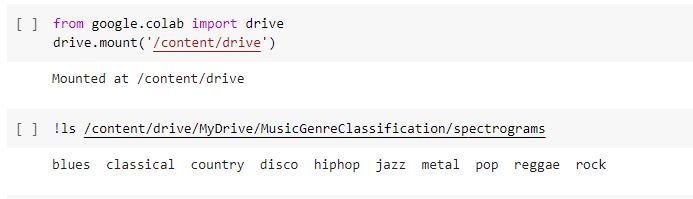

We then define the training data as follows.

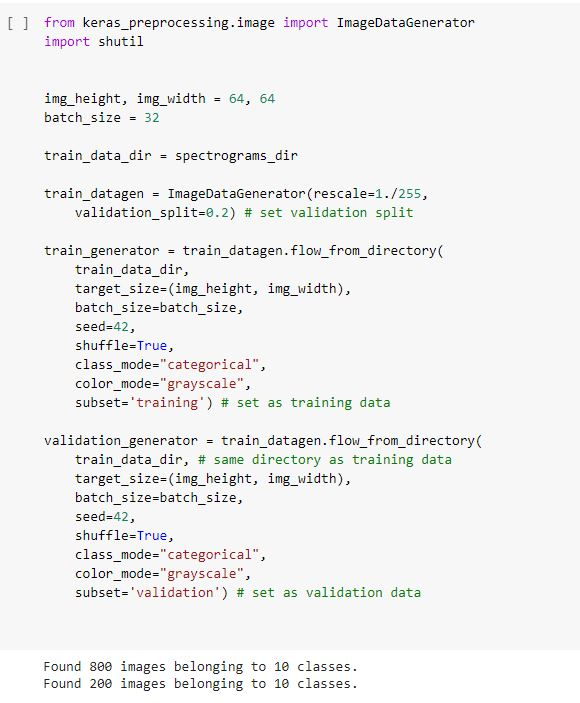


Import Tenserflow and Keras.

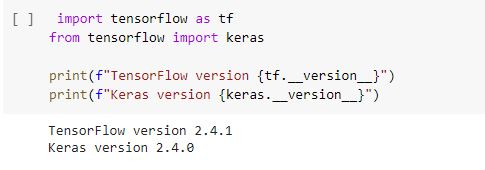

Define the parameters of the CNN model.

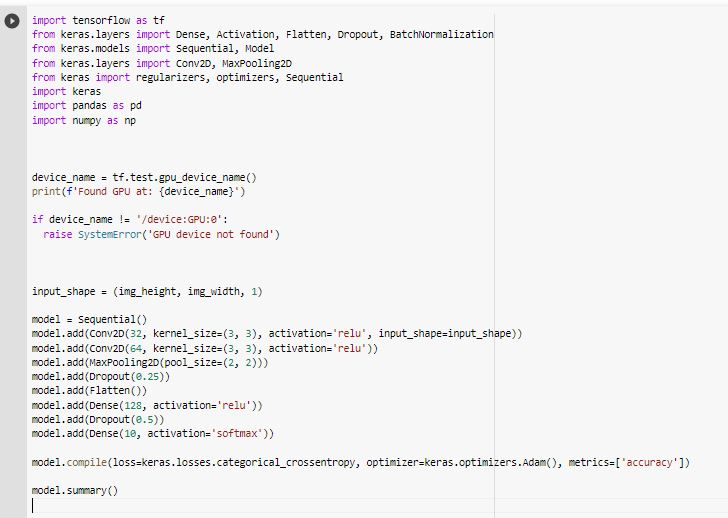


The model identifies the number of parameters.


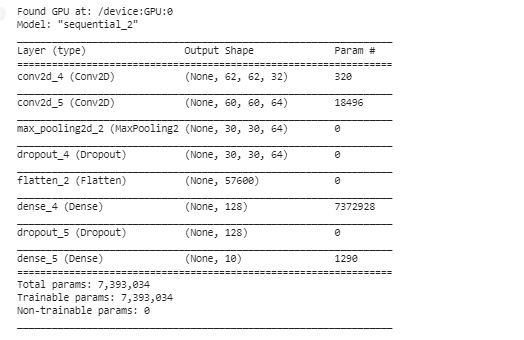

We then run the model on 20 epochs.

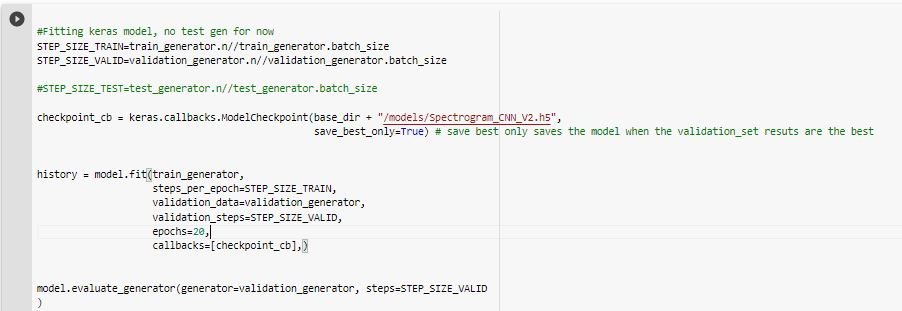

And plot the results.

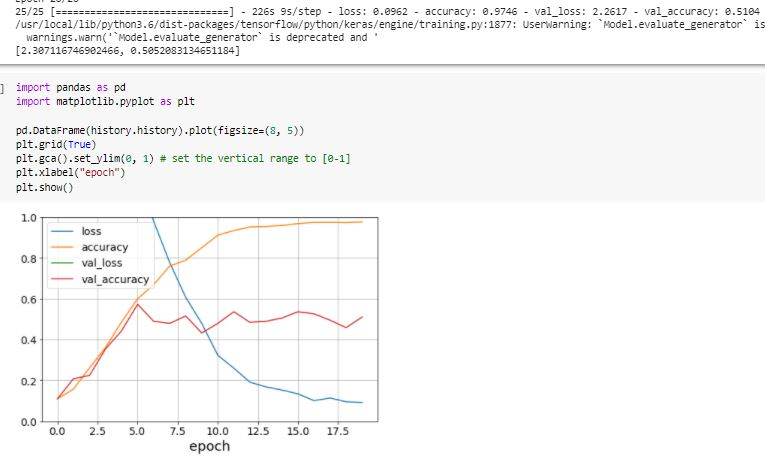



The best accuracy we get using the CNN model on extracted spectograms is **51%.**

Although the score isn't as good as our NN score, this approach was very interesting and allowed to use new tools.

### Final Model and Input Evaluation

In this work we've taken 4 different approaches and obtained various results :

- Linear Support Vector Classification : 66% accuracy using RandomForestRegressor Feature Selection
- K-Nearest Neighbors : 70% accuracy using a custom combined RandomForestRegressor Feature Selection and number of Neighbors Selection
- Neural Network : **73.2%** accuracy 
- Convolutional Neural Network : 51% accuracy

The final model for our work is therefore the best iteration of our Neural Network model.


In order perform Input Evaluation, and to dress a portfolio of our work, we've hosted our model using a React.js web app consuming a Python3 REST API at the following link :

https://classify.k8s.pouretadev.com/home


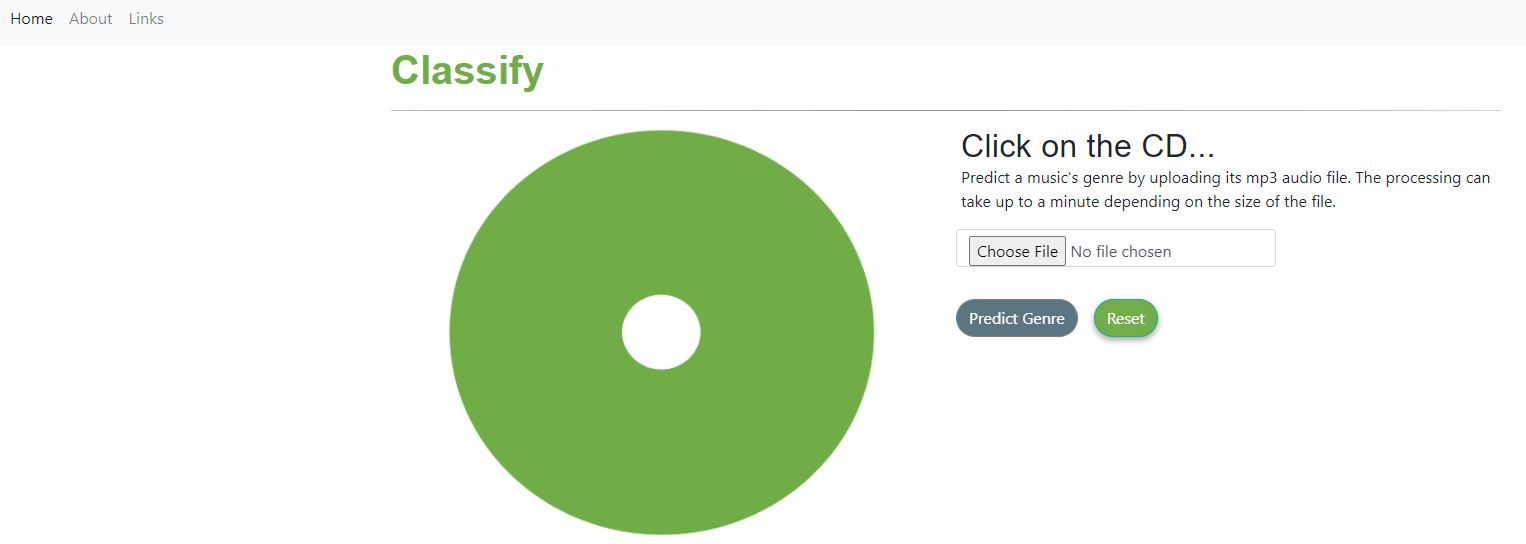

Once an mp3 file is uploaded, a music player appears and the prediction can be asked.


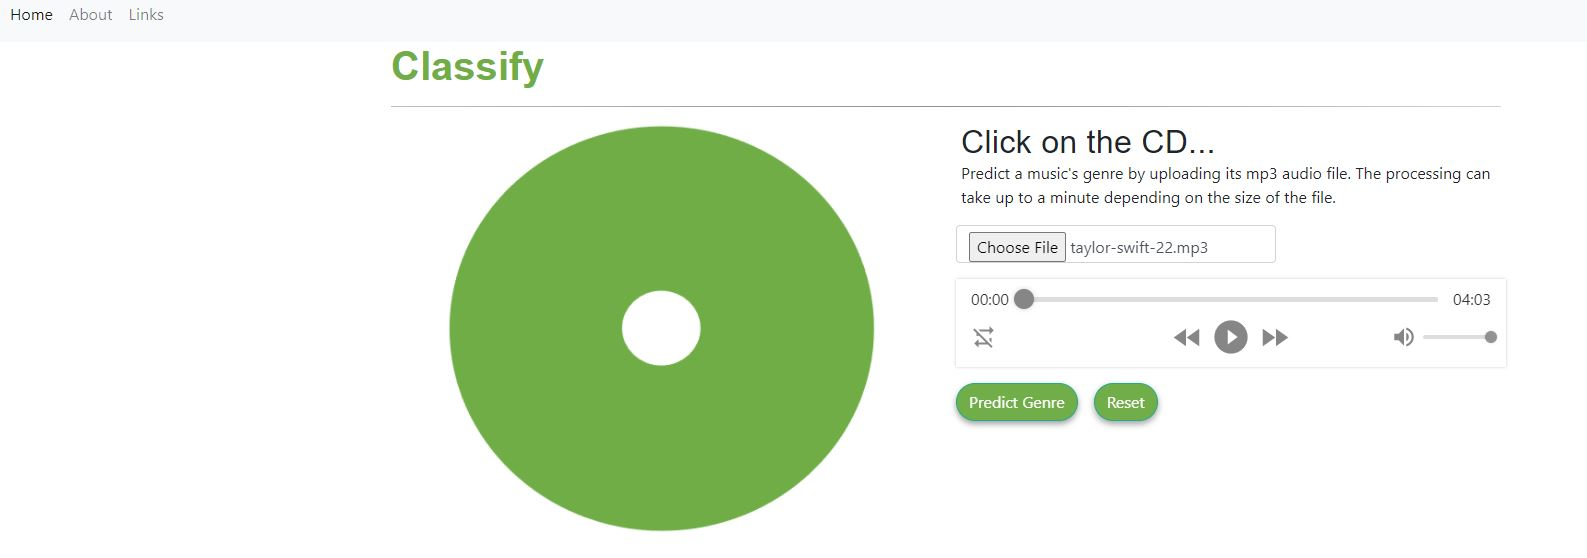

After a short runtime, the prediction is given.


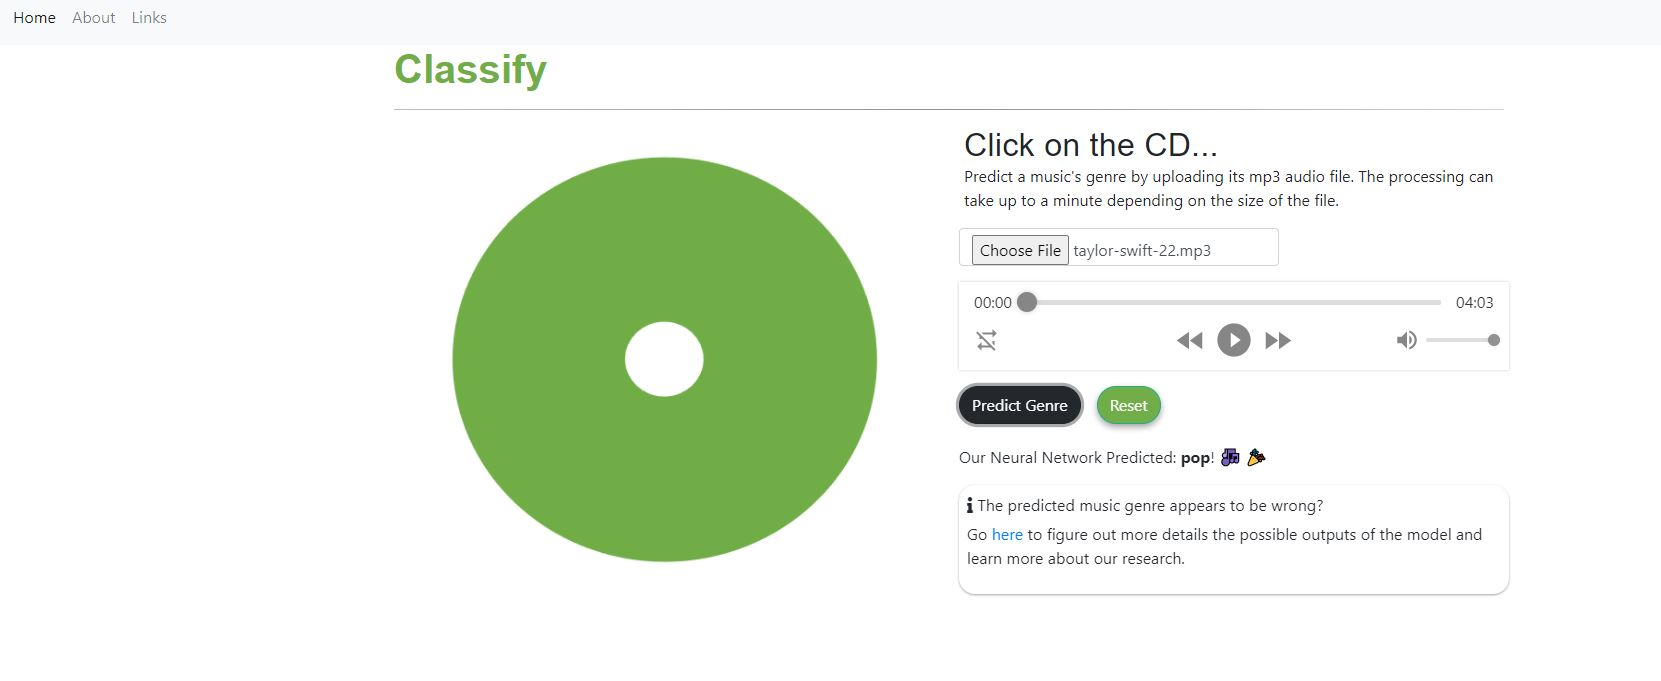

Our web app also provides information about our project in the "About" section and the links to our githubs in the "Links" Section.

TODO : add other input evaluations

### Conclusion : TODO